In [1]:
#import das libs
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader, TensorDataset
from IPython.display import clear_output

In [2]:
#import dos dados
data = pd.read_csv("data/lithology.csv",';') 

In [3]:
pd.set_option('display.float_format', str)
data.head()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,494.528,437641.96875,6470972.5,-469.50183110000006,19.480834961,-999.0,1.6114097834,1.7986813784,1.884185791,80.20085144,...,24.73569095158781,0.31484686817707136,0.15017183162707218,-0.0,-0.0,-0.0,0.0,0.0,6,68
1,494.68,437641.96875,6470972.5,-469.6538086,19.468799591,-999.0,1.6180702448,1.7956413031,1.8897935152,79.262886047,...,24.492376100271635,0.3185281394725607,0.1482686127827626,0.5277099599999815,-0.005607724200000108,0.9379653929999988,0.1519999999999868,-0.24331485131617114,6,68
2,494.832,437641.96875,6470972.5,-469.8057861,19.468799591,-999.0,1.6264585257,1.8007333279,1.8965227604,74.821998596,...,24.202298635769967,0.3229456493770365,0.13925763994167714,0.4298553499999969,-0.006729245199999846,4.440887450999995,0.1519999999999868,-0.29007746450166394,6,68
3,494.984,437641.96875,6470972.5,-469.9577942,19.459281921,-999.0,1.6215940714,1.8015166521,1.891912818,72.878921509,...,24.4007967435326,0.3199193863110002,0.1353149561758119,0.02418518000001768,0.004609942399999678,1.9430770870000058,0.15200000000004366,0.19849810776263155,6,68
4,495.136,437641.96875,6470972.5,-470.1097717,19.453100204000002,-999.0,1.6026790141999998,1.7952990532,1.8800340891,71.729141235,...,24.91676523082089,0.31212142368536505,0.13298194527730406,0.021087649999998348,0.01187872890000019,1.149780273999994,0.15199999999992994,0.5159684872882906,6,68


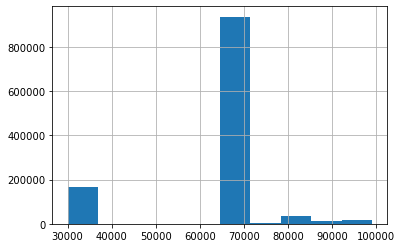

In [7]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].hist()

In [13]:
#classes

classes = [30000, 65030, 65000, 80000, 74000, 70000, 70032, 88000, 86000, 99000, 90000, 93000]

# Fazendo o mapeamento das classes para indexs e vice-versa
class_to_idx_map = {clazz: index for index, clazz in enumerate(classes)}
idx_to_class_map = {value: key for key, value in class_to_idx_map.items()}

# fazendo a substituição
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: class_to_idx_map[x])
y.value_counts()

2     720803
0     168937
1     150455
5      56320
3      33329
9      15245
6      10513
7       8213
10      3820
4       1688
8       1085
11       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [14]:
data.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded'],
      dtype='object')

In [15]:
toNormalize = data[['DEPTH_MD','CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC','Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded']]

In [16]:
trans = StandardScaler()
toNormalize = trans.fit_transform(toNormalize)

In [17]:
dataset = pd.DataFrame(toNormalize, columns=['DEPTH_MD','CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC','Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded'])
dataset

,DEPTH_MD,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,-1.694334128909411,0.3084756138032973,-1.0693631405015405,0.15993376918691346,0.004074022881509362,0.39857869621496994,0.2713045766070431,-1.3745627732845607,0.8909950033845225,0.40438960126020246,...,0.43827485239517355,0.39902933495890625,-0.6308417120290115,0.18486216348815823,0.39990697628745736,0.00020882012585052832,-0.47652481014254655,0.3999086013497214,-0.20076668337802658,1.1698094561695116
1,-1.6941816993138488,0.30843049520729493,-1.0693631405015405,0.15996919422612227,0.004053694803003962,0.39859494538697154,0.24390390283747143,-1.3745627732845607,0.8879129364163525,0.4018095302823455,...,0.43757626901170327,0.39904002037456493,-0.6413799363720513,0.1878153364074035,0.3998906948633975,0.2669047957820268,-0.0033415600073469515,0.3992021645798508,-0.20076668337802658,1.1698094561695116
2,-1.6940292697182866,0.30843049520729493,-1.0693631405015405,0.16001380903010226,0.00408774365695368,0.3986144443242936,0.11417277501510865,-1.3745627732845607,0.8943658674024559,0.39970788847666205,...,0.4367434250832547,0.39905284282792863,-0.6912741740380538,0.18726772198626337,0.3998874386478024,1.2629065916668893,-0.0033415600073469515,0.3990663946947379,-0.20076668337802658,1.1698094561695116
3,-1.6938768401227242,0.3083948150489272,-1.0693631405015405,0.15998793642549455,0.004092981512684681,0.39860108636582364,0.05740989040619123,-1.3745627732845607,0.9136741280728121,0.3995896426868492,...,0.4373133347249521,0.3990440586671979,-0.7131050245272529,0.1849975087043507,0.3999203607593802,0.5526927852699974,-0.003341560007169995,0.4004849178438224,-0.20076668337802658,1.1698094561695116
4,-1.6937244105271618,0.3083716408222999,-1.0693631405015405,0.15988733278819292,0.004051406279809925,0.3985666660729968,0.023821493190599487,-1.3745627732845607,0.9263521440021785,0.3994865412904757,...,0.43879473633140614,0.3990214239670475,-0.7260230304185571,0.18498017429263597,0.39994146489916776,0.32713108639826344,-0.003341560007523994,0.4014066566864312,-0.20076668337802658,1.1698094561695116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,0.9880099783824604,0.26702227135864964,-1.0693631405015405,-5.162024620119037,-6.687968823281459,0.40044419138268683,0.19692998197518893,-1.3745627732845607,0.8581541113529022,-0.0484058405514562,...,0.3783204284131475,0.400747934934949,-0.4183979025910817,0.2168145003045298,0.3997615707557143,-4.289747832032567,-0.003341560008585645,0.39632234397826605,1.3987558503753403,-1.5023602786694208
1170507,0.9881624079780227,0.26685759921052743,-1.0693631405015405,-5.162024620119037,-6.687968823281459,0.40047209349159796,0.13000436952753125,-1.3745627732845607,0.8630482201312076,-0.05346181606948839,...,0.37765459975413007,0.4007987263577574,-0.45846057550773744,0.19064927946611557,0.39987901879723564,0.651608550592924,-0.003341560007169995,0.39923528752879,1.3987558503753403,-1.5023602786694208
1170508,0.9883148375735851,0.26674889986206246,-1.0693631405015405,-5.162024620119037,-6.687968823281459,0.4003395177132259,-0.13031440096770056,-1.3745627732845607,0.8671307923219693,-0.028553484074456195,...,0.3808641211877859,0.4005573929003148,-0.6142912862774442,0.1563518580963276,0.4000398152079594,2.533940985352361,-0.003341560007169995,0.40315420381904876,1.3987558503753403,-1.5023602786694208
1170509,0.9884672671691475,0.266612181937345,-1.0693631405015405,-5.162024620119037,-6.687968823281459,0.40021109118852605,-0.44195820099571365,-1.3745627732845607,0.8668374303726565,-0.0021432524053985416,...,0.3840876132603159,0.4003236125098562,-0.8008459276233212,0.15463276994610947,0.4000356577186693,3.033497271520324,-0.003341560007169995,0.4031683315140854,1.3987558503753403,-1.5023602786694208


In [18]:
# dados de entrada
#X = data.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1)
#X

# 'X_LOC', 'Y_LOC', 'Z_LOC'
#dataset['X_LOC'] = data['X_LOC']
#dataset['Y_LOC'] = data['Y_LOC']
#dataset['Z_LOC'] = data['Z_LOC']
X = dataset

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   DEPTH_MD            1170511 non-null  float64
 1   CALI                1170511 non-null  float64
 2   RSHA                1170511 non-null  float64
 3   RMED                1170511 non-null  float64
 4   RDEP                1170511 non-null  float64
 5   RHOB                1170511 non-null  float64
 6   GR                  1170511 non-null  float64
 7   NPHI                1170511 non-null  float64
 8   PEF                 1170511 non-null  float64
 9   DTC                 1170511 non-null  float64
 10  SP                  1170511 non-null  float64
 11  BS                  1170511 non-null  float64
 12  ROP                 1170511 non-null  float64
 13  DCAL                1170511 non-null  float64
 14  DRHO                1170511 non-null  float64
 15  MUDWEIGHT      

In [ ]:
# adicionando , stratify=y
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42, stratify=y)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [26]:
"""
#REGRESSÃO LOGÍSTICA MULTICLASS (SOFTMAX REGRESSION)
"""

# RECEITA DE TREINAMENTO
# 1 - DESIGN DO MODELO (INPUT, OUTPUT, FORWARD PASS)
# 2 - DEFINIÇAO DA FUNÇÃO DE CUSTO E OTIMIZADOR
# 3 - LOOP DE TREINAMENTO:
#     - FORWARD PASS: CALCULAR A PREDIÇÃO E O CUSTO
#     - BACKWARPASS: CALCULAR OS GRADIENTES
#     - ATUALIZAR OS PESOS

# CLASS DE REGRESSÃO LOGÍSTICA

class ModeloInicial(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        input_size = 27
        hidden_neurons = 320
        hidden_neurons2 = 220
        hidden_neurons3 = 220
       # hidden_neurons4 = 220
        output_size = 12
        
        self.layer1 = nn.Linear(input_size, hidden_neurons)         
        self.layer2 = nn.Linear(hidden_neurons, hidden_neurons2)
        self.layer3 = nn.Linear(hidden_neurons2, hidden_neurons3)
        self.layer4 = nn.Linear(hidden_neurons3, hidden_neurons3)
        self.saida = nn.Linear(hidden_neurons3, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.saida(x)
        return x

# DEFINICIÇÃO DE MODELO
model = ModeloInicial()
model

ModeloInicial(
  (layer1): Linear(in_features=27, out_features=320, bias=True)
  (layer2): Linear(in_features=320, out_features=220, bias=True)
  (layer3): Linear(in_features=220, out_features=220, bias=True)
  (layer4): Linear(in_features=220, out_features=220, bias=True)
  (saida): Linear(in_features=220, out_features=12, bias=True)
)

In [ ]:
# Tentativa de uso de mini batch para treinamento

Epoch: 4 Loss: 0.4083773195743561
Epoch: 4 Loss: 0.4513893723487854
Epoch: 4 Loss: 0.3881762623786926
Epoch: 4 Loss: 0.1459752768278122
Epoch: 4 Loss: 0.22415708005428314
Epoch: 4 Loss: 0.29768940806388855
Epoch: 4 Loss: 0.6857069134712219
Epoch: 4 Loss: 0.34789326786994934
Epoch: 4 Loss: 0.5265665650367737
Epoch: 4 Loss: 0.5982274413108826
Epoch: 4 Loss: 0.5646421909332275
Epoch: 4 Loss: 0.23187722265720367
Epoch: 4 Loss: 0.1992458552122116
Epoch: 4 Loss: 0.18433916568756104
Epoch: 4 Loss: 0.31313279271125793
Epoch: 4 Loss: 0.4706355035305023
Epoch: 4 Loss: 0.40820902585983276
Epoch: 4 Loss: 0.18971103429794312
Epoch: 4 Loss: 0.16735446453094482
Epoch: 4 Loss: 0.3167153596878052
Epoch: 4 Loss: 0.6668606400489807
Epoch: 4 Loss: 0.24439775943756104
Epoch: 4 Loss: 0.34035202860832214
Epoch: 4 Loss: 0.3651421070098877
Epoch: 4 Loss: 0.553010880947113
Epoch: 4 Loss: 0.17246803641319275
Epoch: 4 Loss: 0.4994441866874695
Epoch: 4 Loss: 0.37205013632774353
Epoch: 4 Loss: 0.4202582836151123
Ep

Epoch: 4 Loss: 0.26628968119621277
Epoch: 4 Loss: 0.2284255027770996
Epoch: 4 Loss: 0.22257976233959198
Epoch: 4 Loss: 0.3900197148323059
Epoch: 4 Loss: 0.27308911085128784
Epoch: 4 Loss: 0.3847566843032837
Epoch: 4 Loss: 0.6374751329421997
Epoch: 4 Loss: 0.43599021434783936
Epoch: 4 Loss: 0.6069927215576172
Epoch: 4 Loss: 0.3523479998111725
Epoch: 4 Loss: 0.43896403908729553
Epoch: 4 Loss: 0.37076863646507263
Epoch: 4 Loss: 0.512332558631897
Epoch: 4 Loss: 0.49968165159225464
Epoch: 4 Loss: 0.3368464410305023
Epoch: 4 Loss: 0.39109471440315247
Epoch: 4 Loss: 0.499581903219223
Epoch: 4 Loss: 0.44619712233543396
Epoch: 4 Loss: 0.2574944794178009
Epoch: 4 Loss: 0.3287109434604645
Epoch: 4 Loss: 0.30254441499710083
Epoch: 4 Loss: 0.4676872491836548
Epoch: 4 Loss: 0.17914167046546936
Epoch: 4 Loss: 0.34717297554016113
Epoch: 4 Loss: 0.2796781659126282
Epoch: 4 Loss: 0.32437577843666077
Epoch: 4 Loss: 0.2744932472705841
Epoch: 4 Loss: 0.373666912317276
Epoch: 4 Loss: 0.4472630023956299
Epoc

Epoch: 4 Loss: 0.1647222340106964
Epoch: 4 Loss: 0.4172682464122772
Epoch: 4 Loss: 0.4079722762107849
Epoch: 4 Loss: 0.5133308172225952
Epoch: 4 Loss: 0.35131534934043884
Epoch: 4 Loss: 0.4089542627334595
Epoch: 4 Loss: 0.1480247527360916
Epoch: 4 Loss: 0.6321478486061096
Epoch: 4 Loss: 0.4305270314216614
Epoch: 4 Loss: 0.5663637518882751
Epoch: 4 Loss: 0.359483540058136
Epoch: 4 Loss: 0.6311259269714355
Epoch: 4 Loss: 0.5214012861251831
Epoch: 4 Loss: 0.3994518220424652
Epoch: 4 Loss: 0.3759075999259949
Epoch: 4 Loss: 0.23250052332878113
Epoch: 4 Loss: 0.4401102066040039
Epoch: 4 Loss: 0.33225637674331665
Epoch: 4 Loss: 0.7215315699577332
Epoch: 4 Loss: 0.39372923970222473
Epoch: 4 Loss: 0.7867719531059265
Epoch: 4 Loss: 0.39781686663627625
Epoch: 4 Loss: 0.4716845452785492
Epoch: 4 Loss: 0.20315299928188324
Epoch: 4 Loss: 0.22716839611530304
Epoch: 4 Loss: 0.17027118802070618
Epoch: 4 Loss: 0.4624525308609009
Epoch: 4 Loss: 0.3305060565471649
Epoch: 4 Loss: 0.4827558100223541
Epoch: 

Epoch: 4 Loss: 0.32215067744255066
Epoch: 4 Loss: 0.23426787555217743
Epoch: 4 Loss: 0.6415473818778992
Epoch: 4 Loss: 0.6223980784416199
Epoch: 4 Loss: 0.3632591962814331
Epoch: 4 Loss: 0.4217609167098999
Epoch: 4 Loss: 0.3374181091785431
Epoch: 4 Loss: 0.5361746549606323
Epoch: 4 Loss: 0.7137849926948547
Epoch: 4 Loss: 0.23625941574573517
Epoch: 4 Loss: 0.7026406526565552
Epoch: 4 Loss: 0.5515905022621155
Epoch: 4 Loss: 0.6853437423706055
Epoch: 4 Loss: 0.32705289125442505
Epoch: 4 Loss: 0.32449379563331604
Epoch: 4 Loss: 0.6025105118751526
Epoch: 4 Loss: 0.19609370827674866
Epoch: 4 Loss: 0.43377259373664856
Epoch: 4 Loss: 0.2444104254245758
Epoch: 4 Loss: 0.3190936744213104
Epoch: 4 Loss: 0.32692041993141174
Epoch: 4 Loss: 0.3046797811985016
Epoch: 4 Loss: 0.43534040451049805
Epoch: 4 Loss: 0.6898822784423828
Epoch: 4 Loss: 0.4716145098209381
Epoch: 4 Loss: 0.23798777163028717
Epoch: 4 Loss: 0.34040895104408264
Epoch: 4 Loss: 0.36921513080596924
Epoch: 4 Loss: 0.4270137846469879
Ep

Epoch: 4 Loss: 0.43311944603919983
Epoch: 4 Loss: 0.35084620118141174
Epoch: 4 Loss: 0.23108437657356262
Epoch: 4 Loss: 0.6311957240104675
Epoch: 4 Loss: 0.5045432448387146
Epoch: 4 Loss: 0.3356740474700928
Epoch: 4 Loss: 0.1666942536830902
Epoch: 4 Loss: 0.20391207933425903
Epoch: 4 Loss: 0.18455560505390167
Epoch: 4 Loss: 0.5844019651412964
Epoch: 4 Loss: 0.3513176143169403
Epoch: 4 Loss: 0.5918609499931335
Epoch: 4 Loss: 0.2936953008174896
Epoch: 4 Loss: 0.5560440421104431
Epoch: 4 Loss: 0.21104727685451508
Epoch: 4 Loss: 0.3038594722747803
Epoch: 4 Loss: 0.21952292323112488
Epoch: 4 Loss: 0.3231026828289032
Epoch: 4 Loss: 0.4436798691749573
Epoch: 4 Loss: 0.4601653814315796
Epoch: 4 Loss: 0.20613566040992737
Epoch: 4 Loss: 0.27150198817253113
Epoch: 4 Loss: 0.16299495100975037
Epoch: 4 Loss: 0.32354167103767395
Epoch: 4 Loss: 0.4139884412288666
Epoch: 4 Loss: 0.29814618825912476
Epoch: 4 Loss: 0.17304179072380066
Epoch: 4 Loss: 0.18040834367275238
Epoch: 4 Loss: 0.41785961389541626

Epoch: 4 Loss: 0.16501156985759735
Epoch: 4 Loss: 0.45909684896469116
Epoch: 4 Loss: 0.3426474630832672
Epoch: 4 Loss: 0.7838959097862244
Epoch: 4 Loss: 0.3317357003688812
Epoch: 4 Loss: 0.22547246515750885
Epoch: 4 Loss: 0.27923911809921265
Epoch: 4 Loss: 0.315469890832901
Epoch: 4 Loss: 0.22292202711105347
Epoch: 4 Loss: 0.36792469024658203
Epoch: 4 Loss: 0.296722412109375
Epoch: 4 Loss: 0.2078913450241089
Epoch: 4 Loss: 0.2022501528263092
Epoch: 4 Loss: 0.45575955510139465
Epoch: 4 Loss: 0.3448077440261841
Epoch: 4 Loss: 0.3229348659515381
Epoch: 4 Loss: 0.4799194931983948
Epoch: 4 Loss: 0.4718796908855438
Epoch: 4 Loss: 0.3896091878414154
Epoch: 4 Loss: 0.18792779743671417
Epoch: 4 Loss: 0.4772951304912567
Epoch: 4 Loss: 0.2543281316757202
Epoch: 4 Loss: 0.3169665038585663
Epoch: 4 Loss: 0.34352433681488037
Epoch: 4 Loss: 0.2861400246620178
Epoch: 4 Loss: 0.41870447993278503
Epoch: 4 Loss: 0.23348499834537506
Epoch: 4 Loss: 0.4275267422199249
Epoch: 4 Loss: 0.34446555376052856
Epoc

Epoch: 4 Loss: 0.2305399775505066
Epoch: 4 Loss: 0.1906229555606842
Epoch: 4 Loss: 0.156612366437912
Epoch: 4 Loss: 0.304006963968277
Epoch: 4 Loss: 0.23046062886714935
Epoch: 4 Loss: 0.3480890095233917
Epoch: 4 Loss: 0.3613293766975403
Epoch: 4 Loss: 0.27582091093063354
Epoch: 4 Loss: 0.5683850646018982
Epoch: 4 Loss: 0.7512178421020508
Epoch: 4 Loss: 0.3921898901462555
Epoch: 4 Loss: 0.5037403106689453
Epoch: 4 Loss: 0.4842204451560974
Epoch: 4 Loss: 0.3335844576358795
Epoch: 4 Loss: 0.3161667585372925
Epoch: 4 Loss: 0.3936019241809845
Epoch: 4 Loss: 0.4145699441432953
Epoch: 4 Loss: 0.47805243730545044
Epoch: 4 Loss: 0.2757144570350647
Epoch: 4 Loss: 0.318744033575058
Epoch: 4 Loss: 0.4084133505821228
Epoch: 4 Loss: 0.4016527235507965
Epoch: 4 Loss: 0.34728384017944336
Epoch: 4 Loss: 0.48193007707595825
Epoch: 4 Loss: 0.304421991109848
Epoch: 4 Loss: 0.229495108127594
Epoch: 4 Loss: 0.45285460352897644
Epoch: 4 Loss: 0.26804134249687195
Epoch: 4 Loss: 0.5426163673400879
Epoch: 4 Los

Epoch: 4 Loss: 0.5548256635665894
Epoch: 4 Loss: 0.48736312985420227
Epoch: 4 Loss: 0.42738649249076843
Epoch: 4 Loss: 0.21780464053153992
Epoch: 4 Loss: 0.6054985523223877
Epoch: 4 Loss: 0.286438912153244
Epoch: 4 Loss: 0.27708855271339417
Epoch: 4 Loss: 0.13945519924163818
Epoch: 4 Loss: 0.4766009449958801
Epoch: 4 Loss: 0.3973681330680847
Epoch: 4 Loss: 0.31515055894851685
Epoch: 4 Loss: 0.35000672936439514
Epoch: 4 Loss: 0.5551362633705139
Epoch: 4 Loss: 0.38166889548301697
Epoch: 4 Loss: 0.3689492642879486
Epoch: 4 Loss: 0.6878789067268372
Epoch: 4 Loss: 0.43855029344558716
Epoch: 4 Loss: 0.3288085460662842
Epoch: 4 Loss: 0.21697750687599182
Epoch: 4 Loss: 0.33262941241264343
Epoch: 4 Loss: 0.2219676375389099
Epoch: 4 Loss: 0.2618477940559387
Epoch: 4 Loss: 0.2454763799905777
Epoch: 4 Loss: 0.22617577016353607
Epoch: 4 Loss: 0.20810861885547638
Epoch: 4 Loss: 0.29675063490867615
Epoch: 4 Loss: 0.10280447453260422
Epoch: 4 Loss: 0.3365711271762848
Epoch: 4 Loss: 0.4370301067829132


Epoch: 4 Loss: 0.40681537985801697
Epoch: 4 Loss: 0.23207010328769684
Epoch: 4 Loss: 0.4164891541004181
Epoch: 4 Loss: 0.19363558292388916
Epoch: 4 Loss: 0.45441436767578125
Epoch: 4 Loss: 0.2976147532463074
Epoch: 4 Loss: 0.4299086034297943
Epoch: 4 Loss: 0.2631552815437317
Epoch: 4 Loss: 0.2043541967868805
Epoch: 4 Loss: 0.48616263270378113
Epoch: 4 Loss: 0.5360158681869507
Epoch: 4 Loss: 0.455269455909729
Epoch: 4 Loss: 0.4265175759792328
Epoch: 4 Loss: 0.4635376036167145
Epoch: 4 Loss: 0.3593358099460602
Epoch: 4 Loss: 0.18989606201648712
Epoch: 4 Loss: 0.5681736469268799
Epoch: 4 Loss: 0.4942089021205902
Epoch: 4 Loss: 0.3950846493244171
Epoch: 4 Loss: 0.3252717852592468
Epoch: 4 Loss: 0.29901888966560364
Epoch: 4 Loss: 0.47371548414230347
Epoch: 4 Loss: 0.24325646460056305
Epoch: 4 Loss: 0.4673876464366913
Epoch: 4 Loss: 0.18383550643920898
Epoch: 4 Loss: 0.6025931239128113
Epoch: 4 Loss: 0.24181614816188812
Epoch: 4 Loss: 0.32830655574798584
Epoch: 4 Loss: 0.5132753252983093
Epo

Epoch: 4 Loss: 0.3261254131793976
Epoch: 4 Loss: 0.3153941035270691
Epoch: 4 Loss: 0.20010024309158325
Epoch: 4 Loss: 0.2949792444705963
Epoch: 4 Loss: 0.48566868901252747
Epoch: 4 Loss: 0.24610012769699097
Epoch: 4 Loss: 0.41526201367378235
Epoch: 4 Loss: 0.3793618381023407
Epoch: 4 Loss: 0.45837751030921936
Epoch: 4 Loss: 0.2903178334236145
Epoch: 4 Loss: 0.43830054998397827
Epoch: 4 Loss: 0.3964155912399292
Epoch: 4 Loss: 0.2565865218639374
Epoch: 4 Loss: 0.7102514505386353
Epoch: 4 Loss: 0.16994866728782654
Epoch: 4 Loss: 0.29878750443458557
Epoch: 4 Loss: 0.3591473400592804
Epoch: 4 Loss: 0.24156983196735382
Epoch: 4 Loss: 0.30150413513183594
Epoch: 4 Loss: 0.24243135750293732
Epoch: 4 Loss: 0.23140206933021545
Epoch: 4 Loss: 0.5024321675300598
Epoch: 4 Loss: 0.32745620608329773
Epoch: 4 Loss: 0.4204234480857849
Epoch: 4 Loss: 0.5427476167678833
Epoch: 4 Loss: 0.31689462065696716
Epoch: 4 Loss: 0.5050408244132996
Epoch: 4 Loss: 0.6852513551712036
Epoch: 4 Loss: 0.46638792753219604

Epoch: 4 Loss: 0.3680339753627777
Epoch: 4 Loss: 0.3530094027519226
Epoch: 4 Loss: 0.4868297576904297
Epoch: 4 Loss: 0.5324399471282959
Epoch: 4 Loss: 0.20794720947742462
Epoch: 4 Loss: 0.580977201461792
Epoch: 4 Loss: 0.10607311129570007
Epoch: 4 Loss: 0.3409171402454376
Epoch: 4 Loss: 0.30495724081993103
Epoch: 4 Loss: 0.39465346932411194
Epoch: 4 Loss: 0.3575074076652527
Epoch: 4 Loss: 0.3853072226047516
Epoch: 4 Loss: 0.3867183327674866
Epoch: 4 Loss: 0.5327885150909424
Epoch: 4 Loss: 0.4398610293865204
Epoch: 4 Loss: 0.17503143846988678
Epoch: 4 Loss: 0.09566250443458557
Epoch: 4 Loss: 0.38242197036743164
Epoch: 4 Loss: 0.31835663318634033
Epoch: 4 Loss: 0.21461251378059387
Epoch: 4 Loss: 0.7378695607185364
Epoch: 4 Loss: 0.7614562511444092
Epoch: 4 Loss: 0.35250893235206604
Epoch: 4 Loss: 0.3443356454372406
Epoch: 4 Loss: 0.6020243763923645
Epoch: 4 Loss: 0.1897728443145752
Epoch: 4 Loss: 0.5146423578262329
Epoch: 4 Loss: 0.5224828720092773
Epoch: 4 Loss: 0.5083369016647339
Epoch

Epoch: 4 Loss: 0.4954899549484253
Epoch: 4 Loss: 0.3427116572856903
Epoch: 4 Loss: 0.5144369006156921
Epoch: 4 Loss: 0.6179793477058411
Epoch: 4 Loss: 0.40420904755592346
Epoch: 4 Loss: 0.36521583795547485
Epoch: 4 Loss: 0.8003159165382385
Epoch: 4 Loss: 0.6043004989624023
Epoch: 4 Loss: 0.5343576073646545
Epoch: 4 Loss: 0.36524325609207153
Epoch: 4 Loss: 0.3071255087852478
Epoch: 4 Loss: 0.23874787986278534
Epoch: 4 Loss: 0.39579981565475464
Epoch: 4 Loss: 0.3458164930343628
Epoch: 4 Loss: 0.35173478722572327
Epoch: 4 Loss: 0.289176881313324
Epoch: 4 Loss: 0.5193180441856384
Epoch: 4 Loss: 0.23537322878837585
Epoch: 4 Loss: 0.425817608833313
Epoch: 4 Loss: 0.391137033700943
Epoch: 4 Loss: 0.19890742003917694
Epoch: 4 Loss: 0.16047267615795135
Epoch: 4 Loss: 0.2702624499797821
Epoch: 4 Loss: 0.37921494245529175
Epoch: 4 Loss: 0.4055793285369873
Epoch: 4 Loss: 0.3265373706817627
Epoch: 4 Loss: 0.30289414525032043
Epoch: 4 Loss: 0.36165058612823486
Epoch: 4 Loss: 0.3390711843967438
Epoch

Epoch: 4 Loss: 0.22153837978839874
Epoch: 4 Loss: 0.5501828789710999
Epoch: 4 Loss: 0.5691125988960266
Epoch: 4 Loss: 0.43219783902168274
Epoch: 4 Loss: 0.4342384934425354
Epoch: 4 Loss: 0.36729535460472107
Epoch: 4 Loss: 0.5234299898147583
Epoch: 4 Loss: 0.5430901646614075
Epoch: 4 Loss: 0.4083563983440399
Epoch: 4 Loss: 0.45178261399269104
Epoch: 4 Loss: 0.30620893836021423
Epoch: 4 Loss: 0.34364578127861023
Epoch: 4 Loss: 0.18495818972587585
Epoch: 4 Loss: 0.40852585434913635
Epoch: 4 Loss: 0.3042120933532715
Epoch: 4 Loss: 0.22747814655303955
Epoch: 4 Loss: 0.3106710612773895
Epoch: 4 Loss: 0.36653169989585876
Epoch: 4 Loss: 0.2399424910545349
Epoch: 4 Loss: 0.6929084658622742
Epoch: 4 Loss: 0.40811970829963684
Epoch: 4 Loss: 0.5576320290565491
Epoch: 4 Loss: 0.2765218913555145
Epoch: 4 Loss: 0.25879988074302673
Epoch: 4 Loss: 0.3586702048778534
Epoch: 4 Loss: 0.3390052318572998
Epoch: 4 Loss: 0.45488670468330383
Epoch: 4 Loss: 0.14490315318107605
Epoch: 4 Loss: 0.3238612115383148


Epoch: 4 Loss: 0.21422076225280762
Epoch: 4 Loss: 0.46721747517585754
Epoch: 4 Loss: 0.3203970193862915
Epoch: 4 Loss: 0.2670571506023407
Epoch: 4 Loss: 0.5685797333717346
Epoch: 4 Loss: 0.3059989809989929
Epoch: 4 Loss: 0.34269192814826965
Epoch: 4 Loss: 0.38571611046791077
Epoch: 4 Loss: 0.3155440390110016
Epoch: 4 Loss: 0.28838810324668884
Epoch: 4 Loss: 0.26540234684944153
Epoch: 4 Loss: 0.29651162028312683
Epoch: 4 Loss: 0.11504685133695602
Epoch: 4 Loss: 0.12592676281929016
Epoch: 4 Loss: 0.24740484356880188
Epoch: 4 Loss: 0.3706585466861725
Epoch: 4 Loss: 0.4786260724067688
Epoch: 4 Loss: 0.48216506838798523
Epoch: 4 Loss: 0.40788909792900085
Epoch: 4 Loss: 0.3266614079475403
Epoch: 4 Loss: 0.32524383068084717
Epoch: 4 Loss: 0.41417014598846436
Epoch: 4 Loss: 0.21951322257518768
Epoch: 4 Loss: 0.47093817591667175
Epoch: 4 Loss: 0.1729065626859665
Epoch: 4 Loss: 0.3199552595615387
Epoch: 4 Loss: 0.3552328050136566
Epoch: 4 Loss: 0.6960172653198242
Epoch: 4 Loss: 0.335939466953277

Epoch: 4 Loss: 0.2912876605987549
Epoch: 4 Loss: 0.49454978108406067
Epoch: 4 Loss: 0.623781144618988
Epoch: 4 Loss: 0.2918294668197632
Epoch: 4 Loss: 0.3892076909542084
Epoch: 4 Loss: 0.20707136392593384
Epoch: 4 Loss: 0.11554558575153351
Epoch: 4 Loss: 0.39990049600601196
Epoch: 4 Loss: 0.25640344619750977
Epoch: 4 Loss: 0.29732516407966614
Epoch: 4 Loss: 0.5467549562454224
Epoch: 4 Loss: 0.3412368893623352
Epoch: 4 Loss: 0.27411264181137085
Epoch: 4 Loss: 0.2877497375011444
Epoch: 4 Loss: 0.2906546890735626
Epoch: 4 Loss: 0.3118474781513214
Epoch: 4 Loss: 0.3965138792991638
Epoch: 4 Loss: 0.2921183109283447
Epoch: 4 Loss: 0.39893847703933716
Epoch: 4 Loss: 0.24259448051452637
Epoch: 4 Loss: 0.4227445423603058
Epoch: 4 Loss: 0.46060097217559814
Epoch: 4 Loss: 0.32953882217407227
Epoch: 4 Loss: 0.3884713053703308
Epoch: 4 Loss: 0.7224830985069275
Epoch: 4 Loss: 0.4286611080169678
Epoch: 4 Loss: 0.11531443148851395
Epoch: 4 Loss: 0.6558719873428345
Epoch: 4 Loss: 0.42706194519996643
Ep

Epoch: 4 Loss: 0.27539926767349243
Epoch: 4 Loss: 0.28701072931289673
Epoch: 4 Loss: 0.19387082755565643
Epoch: 4 Loss: 0.24441984295845032
Epoch: 4 Loss: 0.3825835585594177
Epoch: 4 Loss: 0.23515811562538147
Epoch: 4 Loss: 0.324495404958725
Epoch: 4 Loss: 0.45712077617645264
Epoch: 4 Loss: 0.30845844745635986
Epoch: 4 Loss: 0.43303075432777405
Epoch: 4 Loss: 0.43716081976890564
Epoch: 4 Loss: 0.2525298297405243
Epoch: 4 Loss: 0.5479286313056946
Epoch: 4 Loss: 0.7903823256492615
Epoch: 4 Loss: 0.6025672554969788
Epoch: 4 Loss: 0.40822383761405945
Epoch: 4 Loss: 0.4506356418132782
Epoch: 4 Loss: 0.3473956882953644
Epoch: 4 Loss: 0.17622172832489014
Epoch: 4 Loss: 0.3590973913669586
Epoch: 4 Loss: 0.21317435801029205
Epoch: 4 Loss: 0.35889938473701477
Epoch: 4 Loss: 0.3003622889518738
Epoch: 4 Loss: 0.288636177778244
Epoch: 4 Loss: 0.49835267663002014
Epoch: 4 Loss: 0.4267503321170807
Epoch: 4 Loss: 0.31245869398117065
Epoch: 4 Loss: 0.4518410265445709
Epoch: 4 Loss: 0.4516206383705139
E

Epoch: 4 Loss: 0.2981480658054352
Epoch: 4 Loss: 0.195043683052063
Epoch: 4 Loss: 0.3690277338027954
Epoch: 4 Loss: 0.40053701400756836
Epoch: 4 Loss: 0.35142335295677185
Epoch: 4 Loss: 0.24325281381607056
Epoch: 4 Loss: 0.840110182762146
Epoch: 4 Loss: 0.3248671591281891
Epoch: 4 Loss: 0.3909691870212555
Epoch: 4 Loss: 0.6484254598617554
Epoch: 4 Loss: 0.3874131441116333
Epoch: 4 Loss: 0.3088601529598236
Epoch: 4 Loss: 0.555544912815094
Epoch: 4 Loss: 0.42536333203315735
Epoch: 4 Loss: 0.5819098949432373
Epoch: 4 Loss: 0.44484877586364746
Epoch: 4 Loss: 0.3300703763961792
Epoch: 4 Loss: 0.24341875314712524
Epoch: 4 Loss: 0.45434319972991943
Epoch: 4 Loss: 0.47413021326065063
Epoch: 4 Loss: 0.5461828112602234
Epoch: 4 Loss: 0.5821597576141357
Epoch: 4 Loss: 0.3869440257549286
Epoch: 4 Loss: 0.24602407217025757
Epoch: 4 Loss: 0.30298319458961487
Epoch: 4 Loss: 0.2141808122396469
Epoch: 4 Loss: 0.4188620448112488
Epoch: 4 Loss: 0.5807725191116333
Epoch: 4 Loss: 0.12498141080141068
Epoch:

Epoch: 4 Loss: 0.32078224420547485
Epoch: 4 Loss: 0.45814067125320435
Epoch: 4 Loss: 0.39887717366218567
Epoch: 4 Loss: 0.40603548288345337
Epoch: 4 Loss: 0.4499293863773346
Epoch: 4 Loss: 0.3404906690120697
Epoch: 4 Loss: 0.4462169110774994
Epoch: 4 Loss: 0.3066462576389313
Epoch: 4 Loss: 0.3862726390361786
Epoch: 4 Loss: 0.2768263816833496
Epoch: 4 Loss: 0.42282599210739136
Epoch: 4 Loss: 0.39139530062675476
Epoch: 4 Loss: 0.15061138570308685
Epoch: 4 Loss: 0.5074146389961243
Epoch: 4 Loss: 0.4330090582370758
Epoch: 4 Loss: 0.36455103754997253
Epoch: 4 Loss: 0.3634648025035858
Epoch: 4 Loss: 0.21680350601673126
Epoch: 4 Loss: 0.2668803036212921
Epoch: 4 Loss: 0.3706321120262146
Epoch: 4 Loss: 0.7166507244110107
Epoch: 4 Loss: 0.5639037489891052
Epoch: 4 Loss: 0.4415699541568756
Epoch: 4 Loss: 0.23019260168075562
Epoch: 4 Loss: 0.21899624168872833
Epoch: 4 Loss: 0.4528978765010834
Epoch: 4 Loss: 0.3588448166847229
Epoch: 4 Loss: 0.4046030044555664
Epoch: 4 Loss: 0.4884876608848572
Epo

Epoch: 4 Loss: 0.42298492789268494
Epoch: 4 Loss: 0.2140410840511322
Epoch: 4 Loss: 0.6563820242881775
Epoch: 4 Loss: 0.3722347021102905
Epoch: 4 Loss: 0.41784656047821045
Epoch: 4 Loss: 0.7194221019744873
Epoch: 4 Loss: 0.4411066770553589
Epoch: 4 Loss: 0.4405136704444885
Epoch: 4 Loss: 0.2757417559623718
Epoch: 4 Loss: 0.5540256500244141
Epoch: 4 Loss: 0.29888755083084106
Epoch: 4 Loss: 0.30679750442504883
Epoch: 4 Loss: 0.2543809115886688
Epoch: 4 Loss: 0.377659410238266
Epoch: 4 Loss: 0.35076913237571716
Epoch: 4 Loss: 0.5382087230682373
Epoch: 4 Loss: 0.3935159742832184
Epoch: 4 Loss: 0.8037137389183044
Epoch: 4 Loss: 0.35156887769699097
Epoch: 4 Loss: 0.3331088721752167
Epoch: 4 Loss: 0.40688344836235046
Epoch: 4 Loss: 0.2887026369571686
Epoch: 4 Loss: 0.37848591804504395
Epoch: 4 Loss: 0.3912711441516876
Epoch: 4 Loss: 0.5992227792739868
Epoch: 4 Loss: 0.2518036365509033
Epoch: 4 Loss: 0.8174993395805359
Epoch: 4 Loss: 0.21206481754779816
Epoch: 4 Loss: 0.35457679629325867
Epoch

Epoch: 4 Loss: 0.4083098769187927
Epoch: 4 Loss: 0.3755130469799042
Epoch: 4 Loss: 0.3868022859096527
Epoch: 4 Loss: 0.6713509559631348
Epoch: 4 Loss: 0.3344828486442566
Epoch: 4 Loss: 0.2867915630340576
Epoch: 4 Loss: 0.27510300278663635
Epoch: 4 Loss: 0.19897176325321198
Epoch: 4 Loss: 0.4508209824562073
Epoch: 4 Loss: 0.4477521777153015
Epoch: 4 Loss: 0.5166593790054321
Epoch: 4 Loss: 0.16851799190044403
Epoch: 4 Loss: 0.4031873345375061
Epoch: 4 Loss: 0.18856975436210632
Epoch: 4 Loss: 0.2669678032398224
Epoch: 4 Loss: 0.36918312311172485
Epoch: 4 Loss: 0.3842877149581909
Epoch: 4 Loss: 0.5115001201629639
Epoch: 4 Loss: 0.47521188855171204
Epoch: 4 Loss: 0.4043930172920227
Epoch: 4 Loss: 0.5018872618675232
Epoch: 4 Loss: 0.15544401109218597
Epoch: 4 Loss: 0.6717329025268555
Epoch: 4 Loss: 0.425544798374176
Epoch: 4 Loss: 0.4337465465068817
Epoch: 4 Loss: 0.11832375824451447
Epoch: 4 Loss: 0.4945754408836365
Epoch: 4 Loss: 0.448546439409256
Epoch: 4 Loss: 0.6197438836097717
Epoch: 4

Epoch: 4 Loss: 0.2256491631269455
Epoch: 4 Loss: 0.5533820986747742
Epoch: 4 Loss: 0.2491840422153473
Epoch: 4 Loss: 0.7092960476875305
Epoch: 4 Loss: 0.39492514729499817
Epoch: 4 Loss: 0.4783681333065033
Epoch: 4 Loss: 0.24880310893058777
Epoch: 4 Loss: 0.6812939643859863
Epoch: 4 Loss: 0.17356640100479126
Epoch: 4 Loss: 0.31342023611068726
Epoch: 4 Loss: 0.39582788944244385
Epoch: 4 Loss: 0.45882448554039
Epoch: 4 Loss: 0.21001659333705902
Epoch: 4 Loss: 0.24761787056922913
Epoch: 4 Loss: 0.4126642346382141
Epoch: 4 Loss: 0.3902185559272766
Epoch: 4 Loss: 0.5155859589576721
Epoch: 4 Loss: 0.18031856417655945
Epoch: 4 Loss: 0.3539724349975586
Epoch: 4 Loss: 0.404222309589386
Epoch: 4 Loss: 0.7080880999565125
Epoch: 4 Loss: 0.47584280371665955
Epoch: 4 Loss: 0.6262784004211426
Epoch: 4 Loss: 0.5372741222381592
Epoch: 4 Loss: 0.417318731546402
Epoch: 4 Loss: 0.2796553373336792
Epoch: 4 Loss: 0.3221384882926941
Epoch: 4 Loss: 0.3725616931915283
Epoch: 4 Loss: 0.35018399357795715
Epoch: 4

Epoch: 4 Loss: 0.3473009765148163
Epoch: 4 Loss: 0.434050589799881
Epoch: 4 Loss: 0.64458829164505
Epoch: 4 Loss: 0.28754886984825134
Epoch: 4 Loss: 0.37571704387664795
Epoch: 4 Loss: 0.22979120910167694
Epoch: 4 Loss: 0.3495059609413147
Epoch: 4 Loss: 0.734808623790741
Epoch: 4 Loss: 0.4743809998035431
Epoch: 4 Loss: 0.46494945883750916
Epoch: 4 Loss: 0.13339148461818695
Epoch: 4 Loss: 0.34660807251930237
Epoch: 4 Loss: 0.7759160995483398
Epoch: 4 Loss: 0.601554811000824
Epoch: 4 Loss: 0.4614577293395996
Epoch: 4 Loss: 0.5827174186706543
Epoch: 4 Loss: 0.5195518732070923
Epoch: 4 Loss: 0.430890291929245
Epoch: 4 Loss: 0.36083123087882996
Epoch: 4 Loss: 0.7913805842399597
Epoch: 4 Loss: 0.3334546387195587
Epoch: 4 Loss: 0.2838938236236572
Epoch: 4 Loss: 0.6288753151893616
Epoch: 4 Loss: 0.5279317498207092
Epoch: 4 Loss: 0.40688252449035645
Epoch: 4 Loss: 0.19764187932014465
Epoch: 4 Loss: 0.35067155957221985
Epoch: 4 Loss: 0.24798816442489624
Epoch: 4 Loss: 0.5088292956352234
Epoch: 4 

Epoch: 4 Loss: 0.6939577460289001
Epoch: 4 Loss: 0.3059839606285095
Epoch: 4 Loss: 0.5199616551399231
Epoch: 4 Loss: 0.162663072347641
Epoch: 4 Loss: 0.28914132714271545
Epoch: 4 Loss: 0.5140564441680908
Epoch: 4 Loss: 0.3468395173549652
Epoch: 4 Loss: 0.32561758160591125
Epoch: 4 Loss: 0.7107827067375183
Epoch: 4 Loss: 0.3583844006061554
Epoch: 4 Loss: 0.1935979723930359
Epoch: 4 Loss: 0.5858608484268188
Epoch: 4 Loss: 0.4428146481513977
Epoch: 4 Loss: 0.2953260838985443
Epoch: 4 Loss: 0.20708638429641724
Epoch: 4 Loss: 0.44657260179519653
Epoch: 4 Loss: 0.3560950756072998
Epoch: 4 Loss: 0.15314464271068573
Epoch: 4 Loss: 0.4290676414966583
Epoch: 4 Loss: 0.31524837017059326
Epoch: 4 Loss: 0.4453224837779999
Epoch: 4 Loss: 0.2509733736515045
Epoch: 4 Loss: 0.37213054299354553
Epoch: 4 Loss: 0.38205718994140625
Epoch: 4 Loss: 0.2577601969242096
Epoch: 4 Loss: 0.3699375092983246
Epoch: 4 Loss: 0.20346124470233917
Epoch: 4 Loss: 0.2914431691169739
Epoch: 4 Loss: 0.7426037192344666
Epoch:

Epoch: 4 Loss: 0.6122967004776001
Epoch: 4 Loss: 0.3161788880825043
Epoch: 4 Loss: 0.702365517616272
Epoch: 4 Loss: 0.3120338022708893
Epoch: 4 Loss: 0.19229756295681
Epoch: 4 Loss: 0.46726787090301514
Epoch: 4 Loss: 0.39635828137397766
Epoch: 4 Loss: 0.11657165735960007
Epoch: 4 Loss: 0.33425575494766235
Epoch: 4 Loss: 0.47019127011299133
Epoch: 4 Loss: 0.3123469650745392
Epoch: 4 Loss: 0.8259773254394531
Epoch: 4 Loss: 0.32058554887771606
Epoch: 4 Loss: 0.49029114842414856
Epoch: 4 Loss: 0.49757009744644165
Epoch: 4 Loss: 0.36737847328186035
Epoch: 4 Loss: 0.31980881094932556
Epoch: 4 Loss: 0.3294382691383362
Epoch: 4 Loss: 0.3582499921321869
Epoch: 4 Loss: 0.3641092777252197
Epoch: 4 Loss: 0.32593509554862976
Epoch: 4 Loss: 0.39144259691238403
Epoch: 4 Loss: 0.46410271525382996
Epoch: 4 Loss: 0.7855369448661804
Epoch: 4 Loss: 0.35115206241607666
Epoch: 4 Loss: 0.40612003207206726
Epoch: 4 Loss: 0.30604830384254456
Epoch: 4 Loss: 0.3776821196079254
Epoch: 4 Loss: 0.29749539494514465


Epoch: 4 Loss: 0.34197425842285156
Epoch: 4 Loss: 0.37126561999320984
Epoch: 4 Loss: 0.24586226046085358
Epoch: 4 Loss: 0.32471349835395813
Epoch: 4 Loss: 0.5030202269554138
Epoch: 4 Loss: 0.5540341734886169
Epoch: 4 Loss: 0.411668986082077
Epoch: 4 Loss: 0.41495874524116516
Epoch: 4 Loss: 0.3774603009223938
Epoch: 4 Loss: 0.3898569345474243
Epoch: 4 Loss: 0.7429652810096741
Epoch: 4 Loss: 0.2217300832271576
Epoch: 4 Loss: 0.38898611068725586
Epoch: 4 Loss: 0.3862537443637848
Epoch: 4 Loss: 0.5046715140342712
Epoch: 4 Loss: 0.3822057843208313
Epoch: 4 Loss: 0.3324526846408844
Epoch: 4 Loss: 0.260826051235199
Epoch: 4 Loss: 0.3917488157749176
Epoch: 4 Loss: 0.7654310464859009
Epoch: 4 Loss: 0.18882955610752106
Epoch: 4 Loss: 0.3264613747596741
Epoch: 4 Loss: 0.626876711845398
Epoch: 4 Loss: 0.5923823714256287
Epoch: 4 Loss: 0.5343867540359497
Epoch: 4 Loss: 0.8752250075340271
Epoch: 4 Loss: 0.3650904893875122
Epoch: 4 Loss: 0.3986853361129761
Epoch: 4 Loss: 0.5347143411636353
Epoch: 4 L

Epoch: 4 Loss: 0.3633851706981659
Epoch: 4 Loss: 0.25361090898513794
Epoch: 4 Loss: 0.3922605812549591
Epoch: 4 Loss: 0.4627528190612793
Epoch: 4 Loss: 0.503163754940033
Epoch: 4 Loss: 0.37785980105400085
Epoch: 4 Loss: 0.4485742449760437
Epoch: 4 Loss: 0.4201301038265228
Epoch: 4 Loss: 0.4673853814601898
Epoch: 4 Loss: 0.5582286715507507
Epoch: 4 Loss: 0.3302488327026367
Epoch: 4 Loss: 0.28535860776901245
Epoch: 4 Loss: 0.3333120346069336
Epoch: 4 Loss: 0.3429822027683258
Epoch: 4 Loss: 0.5024971961975098
Epoch: 4 Loss: 0.21564671397209167
Epoch: 4 Loss: 0.32956254482269287
Epoch: 4 Loss: 0.17687730491161346
Epoch: 4 Loss: 0.7146965861320496
Epoch: 4 Loss: 0.4682936668395996
Epoch: 4 Loss: 0.4028773903846741
Epoch: 4 Loss: 0.35029923915863037
Epoch: 4 Loss: 0.3153276741504669
Epoch: 4 Loss: 0.35653921961784363
Epoch: 4 Loss: 0.5121147036552429
Epoch: 4 Loss: 0.425795316696167
Epoch: 4 Loss: 0.5193417072296143
Epoch: 4 Loss: 0.4594888687133789
Epoch: 4 Loss: 0.15117217600345612
Epoch: 

Epoch: 4 Loss: 0.3116811215877533
Epoch: 4 Loss: 0.41454094648361206
Epoch: 4 Loss: 0.3362293243408203
Epoch: 4 Loss: 0.35312536358833313
Epoch: 4 Loss: 0.3628809452056885
Epoch: 4 Loss: 0.29984718561172485
Epoch: 4 Loss: 0.5218525528907776
Epoch: 4 Loss: 0.15828734636306763
Epoch: 4 Loss: 0.2574686110019684
Epoch: 4 Loss: 0.3851916193962097
Epoch: 4 Loss: 0.23691429197788239
Epoch: 4 Loss: 0.5132429003715515
Epoch: 4 Loss: 0.3944989740848541
Epoch: 4 Loss: 0.3714050352573395
Epoch: 4 Loss: 0.5777998566627502
Epoch: 4 Loss: 0.6151784062385559
Epoch: 4 Loss: 0.23308402299880981
Epoch: 4 Loss: 0.5667204260826111
Epoch: 4 Loss: 0.5868965983390808
Epoch: 4 Loss: 0.4210141599178314
Epoch: 4 Loss: 0.19267506897449493
Epoch: 4 Loss: 0.6280918121337891
Epoch: 4 Loss: 0.39792129397392273
Epoch: 4 Loss: 0.36152634024620056
Epoch: 4 Loss: 0.34653589129447937
Epoch: 4 Loss: 0.5001370310783386
Epoch: 4 Loss: 0.37656933069229126
Epoch: 4 Loss: 0.44584617018699646
Epoch: 4 Loss: 0.45987531542778015
E

Epoch: 4 Loss: 0.3131430447101593
Epoch: 4 Loss: 0.3460063338279724
Epoch: 4 Loss: 0.22526401281356812
Epoch: 4 Loss: 0.343023419380188
Epoch: 4 Loss: 0.688291072845459
Epoch: 4 Loss: 0.22830021381378174
Epoch: 4 Loss: 0.385739266872406
Epoch: 4 Loss: 0.3067557215690613
Epoch: 4 Loss: 0.18169736862182617
Epoch: 4 Loss: 0.7049542665481567
Epoch: 4 Loss: 0.30471178889274597
Epoch: 4 Loss: 0.6432719230651855
Epoch: 4 Loss: 0.3876658082008362
Epoch: 4 Loss: 0.363914430141449
Epoch: 4 Loss: 0.32009145617485046
Epoch: 4 Loss: 0.3925679326057434
Epoch: 4 Loss: 0.43682557344436646
Epoch: 4 Loss: 0.4513337016105652
Epoch: 4 Loss: 0.22142288088798523
Epoch: 4 Loss: 0.3618433177471161
Epoch: 4 Loss: 0.45405641198158264
Epoch: 4 Loss: 0.4063006639480591
Epoch: 4 Loss: 0.21213015913963318
Epoch: 4 Loss: 0.22446203231811523
Epoch: 4 Loss: 0.28156718611717224
Epoch: 4 Loss: 0.34670305252075195
Epoch: 4 Loss: 0.2947239577770233
Epoch: 4 Loss: 0.3335508406162262
Epoch: 4 Loss: 0.6078625917434692
Epoch:

Epoch: 4 Loss: 0.46301910281181335
Epoch: 4 Loss: 0.2606298327445984
Epoch: 4 Loss: 0.35099494457244873
Epoch: 4 Loss: 0.33209550380706787
Epoch: 4 Loss: 0.42394328117370605
Epoch: 4 Loss: 0.4094622731208801
Epoch: 4 Loss: 0.22378163039684296
Epoch: 4 Loss: 0.3457247316837311
Epoch: 4 Loss: 0.3679443597793579
Epoch: 4 Loss: 0.4712560474872589
Epoch: 4 Loss: 0.27481332421302795
Epoch: 4 Loss: 0.5020231604576111
Epoch: 4 Loss: 0.6258941888809204
Epoch: 4 Loss: 0.8780114650726318
Epoch: 4 Loss: 0.21053160727024078
Epoch: 4 Loss: 0.3274116814136505
Epoch: 4 Loss: 0.6668718457221985
Epoch: 4 Loss: 0.3676875829696655
Epoch: 4 Loss: 0.6446065902709961
Epoch: 4 Loss: 0.20600678026676178
Epoch: 4 Loss: 0.4225820302963257
Epoch: 4 Loss: 0.24897204339504242
Epoch: 4 Loss: 0.49456924200057983
Epoch: 4 Loss: 0.19642318785190582
Epoch: 4 Loss: 0.2791692912578583
Epoch: 4 Loss: 0.4048784673213959
Epoch: 4 Loss: 0.2819562256336212
Epoch: 4 Loss: 0.6579155921936035
Epoch: 4 Loss: 0.24935166537761688
Ep

Epoch: 4 Loss: 0.5484544634819031
Epoch: 4 Loss: 0.6900144815444946
Epoch: 4 Loss: 0.23698803782463074
Epoch: 4 Loss: 0.1230604499578476
Epoch: 4 Loss: 0.5007344484329224
Epoch: 4 Loss: 0.7000864744186401
Epoch: 4 Loss: 0.42052415013313293
Epoch: 4 Loss: 0.4086083769798279
Epoch: 4 Loss: 0.7209165096282959
Epoch: 4 Loss: 0.4245978593826294
Epoch: 4 Loss: 0.3372284471988678
Epoch: 4 Loss: 0.3363165259361267
Epoch: 4 Loss: 0.16843298077583313
Epoch: 4 Loss: 0.5521562695503235
Epoch: 4 Loss: 0.3077240288257599
Epoch: 4 Loss: 0.3712622821331024
Epoch: 4 Loss: 0.440693199634552
Epoch: 4 Loss: 0.19726820290088654
Epoch: 4 Loss: 0.15202206373214722
Epoch: 4 Loss: 0.20442256331443787
Epoch: 4 Loss: 0.4903518557548523
Epoch: 4 Loss: 0.2137106955051422
Epoch: 4 Loss: 0.48490458726882935
Epoch: 4 Loss: 0.5694656372070312
Epoch: 4 Loss: 0.5028179883956909
Epoch: 4 Loss: 0.4748010039329529
Epoch: 4 Loss: 0.37897825241088867
Epoch: 4 Loss: 0.5661518573760986
Epoch: 4 Loss: 0.5477320551872253
Epoch: 

Epoch: 4 Loss: 0.13248440623283386
Epoch: 4 Loss: 0.3658866882324219
Epoch: 4 Loss: 0.30051806569099426
Epoch: 4 Loss: 0.4394025504589081
Epoch: 4 Loss: 0.873369038105011
Epoch: 4 Loss: 0.3903195261955261
Epoch: 4 Loss: 0.29722169041633606
Epoch: 4 Loss: 0.3614082336425781
Epoch: 4 Loss: 0.37585893273353577
Epoch: 4 Loss: 0.4470294713973999
Epoch: 4 Loss: 0.264132559299469
Epoch: 4 Loss: 0.8403430581092834
Epoch: 4 Loss: 0.31235334277153015
Epoch: 4 Loss: 0.2919950783252716
Epoch: 4 Loss: 0.22566133737564087
Epoch: 4 Loss: 0.24774877727031708
Epoch: 4 Loss: 0.34925052523612976
Epoch: 4 Loss: 0.2194029688835144
Epoch: 4 Loss: 0.3395192325115204
Epoch: 4 Loss: 0.2685321867465973
Epoch: 4 Loss: 0.28469911217689514
Epoch: 4 Loss: 0.36587586998939514
Epoch: 4 Loss: 0.32625821232795715
Epoch: 4 Loss: 0.6556877493858337
Epoch: 4 Loss: 0.5777396559715271
Epoch: 4 Loss: 0.4725368022918701
Epoch: 4 Loss: 0.7118184566497803
Epoch: 4 Loss: 0.25259631872177124
Epoch: 4 Loss: 0.06526970118284225
Epo

Epoch: 4 Loss: 0.418571412563324
Epoch: 4 Loss: 0.8018078804016113
Epoch: 4 Loss: 0.5309856534004211
Epoch: 4 Loss: 0.5599735975265503
Epoch: 4 Loss: 0.4167059361934662
Epoch: 4 Loss: 0.20196622610092163
Epoch: 4 Loss: 0.3043721318244934
Epoch: 4 Loss: 0.4488774240016937
Epoch: 4 Loss: 0.5199069976806641
Epoch: 4 Loss: 0.35003209114074707
Epoch: 4 Loss: 0.7521138191223145
Epoch: 4 Loss: 0.30715876817703247
Epoch: 4 Loss: 0.18910683691501617
Epoch: 4 Loss: 0.36627423763275146
Epoch: 4 Loss: 0.5234947204589844
Epoch: 4 Loss: 0.34240737557411194
Epoch: 4 Loss: 0.37586548924446106
Epoch: 4 Loss: 0.3873392939567566
Epoch: 4 Loss: 0.39108291268348694
Epoch: 4 Loss: 0.175789013504982
Epoch: 4 Loss: 0.3275924324989319
Epoch: 4 Loss: 0.23757174611091614
Epoch: 4 Loss: 0.2587113678455353
Epoch: 4 Loss: 0.3324165940284729
Epoch: 4 Loss: 0.44382038712501526
Epoch: 4 Loss: 0.4419902265071869
Epoch: 4 Loss: 0.3128810524940491
Epoch: 4 Loss: 0.43036162853240967
Epoch: 4 Loss: 0.4581149220466614
Epoch

Epoch: 4 Loss: 0.32928407192230225
Epoch: 4 Loss: 0.6934615969657898
Epoch: 4 Loss: 0.38270649313926697
Epoch: 4 Loss: 0.11305949091911316
Epoch: 4 Loss: 0.4729437232017517
Epoch: 4 Loss: 0.41699880361557007
Epoch: 4 Loss: 0.4081268310546875
Epoch: 4 Loss: 0.3527471423149109
Epoch: 4 Loss: 0.23808631300926208
Epoch: 4 Loss: 0.47675004601478577
Epoch: 4 Loss: 0.7472848296165466
Epoch: 4 Loss: 0.23570629954338074
Epoch: 4 Loss: 0.2521958649158478
Epoch: 4 Loss: 0.4099706709384918
Epoch: 4 Loss: 0.35302454233169556
Epoch: 4 Loss: 0.3225138187408447
Epoch: 4 Loss: 0.30934956669807434
Epoch: 4 Loss: 0.552043080329895
Epoch: 4 Loss: 0.20345145463943481
Epoch: 4 Loss: 0.5543094873428345
Epoch: 4 Loss: 0.32701513171195984
Epoch: 4 Loss: 0.6117545366287231
Epoch: 4 Loss: 0.6447464823722839
Epoch: 4 Loss: 0.3750647008419037
Epoch: 4 Loss: 0.29813602566719055
Epoch: 4 Loss: 0.2450103461742401
Epoch: 4 Loss: 0.38942185044288635
Epoch: 4 Loss: 0.35071316361427307
Epoch: 4 Loss: 0.4680882692337036
E

Epoch: 4 Loss: 0.3322533667087555
Epoch: 4 Loss: 0.12791521847248077
Epoch: 4 Loss: 0.5886126160621643
Epoch: 4 Loss: 0.24691228568553925
Epoch: 4 Loss: 0.1464514136314392
Epoch: 4 Loss: 0.6097231507301331
Epoch: 4 Loss: 0.1743624210357666
Epoch: 4 Loss: 0.4716150164604187
Epoch: 4 Loss: 0.32672616839408875
Epoch: 4 Loss: 0.34501081705093384
Epoch: 4 Loss: 0.37746283411979675
Epoch: 4 Loss: 0.4674873650074005
Epoch: 4 Loss: 0.647506833076477
Epoch: 4 Loss: 0.4287818968296051
Epoch: 4 Loss: 0.42950528860092163
Epoch: 4 Loss: 0.36517035961151123
Epoch: 4 Loss: 0.4368555247783661
Epoch: 4 Loss: 0.2393566519021988
Epoch: 4 Loss: 0.2684645652770996
Epoch: 4 Loss: 0.3067123591899872
Epoch: 4 Loss: 0.5094841718673706
Epoch: 4 Loss: 0.38077253103256226
Epoch: 4 Loss: 0.30796337127685547
Epoch: 4 Loss: 0.6029682755470276
Epoch: 4 Loss: 0.44674715399742126
Epoch: 4 Loss: 0.10638222843408585
Epoch: 4 Loss: 0.42439621686935425
Epoch: 4 Loss: 0.35097742080688477
Epoch: 4 Loss: 0.5690284371376038
Ep

Epoch: 4 Loss: 0.23806898295879364
Epoch: 4 Loss: 0.20789426565170288
Epoch: 4 Loss: 0.2739432454109192
Epoch: 4 Loss: 0.3507821261882782
Epoch: 4 Loss: 0.30558300018310547
Epoch: 4 Loss: 0.3239159882068634
Epoch: 4 Loss: 0.2646714746952057
Epoch: 4 Loss: 0.33499181270599365
Epoch: 4 Loss: 0.42027488350868225
Epoch: 4 Loss: 0.3283742070198059
Epoch: 4 Loss: 0.2463700920343399
Epoch: 4 Loss: 0.10133780539035797
Epoch: 4 Loss: 0.3375391364097595
Epoch: 4 Loss: 0.33492323756217957
Epoch: 4 Loss: 0.2647523581981659
Epoch: 4 Loss: 0.5417043566703796
Epoch: 4 Loss: 0.526012659072876
Epoch: 4 Loss: 0.4988674521446228
Epoch: 4 Loss: 0.5824010372161865
Epoch: 4 Loss: 0.2927456796169281
Epoch: 4 Loss: 0.29811227321624756
Epoch: 4 Loss: 0.2926813066005707
Epoch: 4 Loss: 0.5356763601303101
Epoch: 4 Loss: 0.30614596605300903
Epoch: 4 Loss: 0.30339840054512024
Epoch: 4 Loss: 0.13096503913402557
Epoch: 4 Loss: 0.34476879239082336
Epoch: 4 Loss: 0.5032956600189209
Epoch: 4 Loss: 0.2502124309539795
Epo

Epoch: 4 Loss: 0.13782568275928497
Epoch: 4 Loss: 0.24402235448360443
Epoch: 4 Loss: 0.25679656863212585
Epoch: 4 Loss: 0.44561803340911865
Epoch: 4 Loss: 0.30486640334129333
Epoch: 4 Loss: 0.5433815121650696
Epoch: 4 Loss: 0.4509069621562958
Epoch: 4 Loss: 0.5004532933235168
Epoch: 4 Loss: 0.3371019661426544
Epoch: 4 Loss: 0.38148221373558044
Epoch: 4 Loss: 0.17508886754512787
Epoch: 4 Loss: 0.28751465678215027
Epoch: 4 Loss: 0.5078523755073547
Epoch: 4 Loss: 0.3473423719406128
Epoch: 4 Loss: 0.3202941119670868
Epoch: 4 Loss: 0.30018115043640137
Epoch: 4 Loss: 0.23315468430519104
Epoch: 4 Loss: 0.41452306509017944
Epoch: 4 Loss: 0.4643908441066742
Epoch: 4 Loss: 0.33451908826828003
Epoch: 4 Loss: 0.4143635034561157
Epoch: 4 Loss: 0.299134761095047
Epoch: 4 Loss: 0.6741415858268738
Epoch: 4 Loss: 0.25111401081085205
Epoch: 4 Loss: 0.47664281725883484
Epoch: 4 Loss: 0.39353469014167786
Epoch: 4 Loss: 0.1488383561372757
Epoch: 4 Loss: 0.6214022636413574
Epoch: 4 Loss: 0.4735856056213379


Epoch: 4 Loss: 0.2634328007698059
Epoch: 4 Loss: 0.2819666564464569
Epoch: 4 Loss: 0.4762418270111084
Epoch: 4 Loss: 0.33713510632514954
Epoch: 4 Loss: 0.38064220547676086
Epoch: 4 Loss: 0.40441519021987915
Epoch: 4 Loss: 0.3441084027290344
Epoch: 4 Loss: 0.25962358713150024
Epoch: 4 Loss: 0.37148517370224
Epoch: 4 Loss: 0.33976906538009644
Epoch: 4 Loss: 0.32214197516441345
Epoch: 4 Loss: 0.6012002229690552
Epoch: 4 Loss: 0.5188013911247253
Epoch: 4 Loss: 0.30157583951950073
Epoch: 4 Loss: 0.28147780895233154
Epoch: 4 Loss: 0.2726950943470001
Epoch: 4 Loss: 0.24630995094776154
Epoch: 4 Loss: 0.17250023782253265
Epoch: 4 Loss: 0.24720704555511475
Epoch: 4 Loss: 0.3866923451423645
Epoch: 4 Loss: 0.5717965960502625
Epoch: 4 Loss: 0.2808564007282257
Epoch: 4 Loss: 0.4005049467086792
Epoch: 4 Loss: 0.5675702095031738
Epoch: 4 Loss: 0.38405996561050415
Epoch: 4 Loss: 0.3291037976741791
Epoch: 4 Loss: 0.41462209820747375
Epoch: 4 Loss: 0.471725195646286
Epoch: 4 Loss: 0.4630010724067688
Epoc

Epoch: 4 Loss: 0.7158911824226379
Epoch: 4 Loss: 0.16231787204742432
Epoch: 4 Loss: 0.1984218955039978
Epoch: 4 Loss: 0.306538462638855
Epoch: 4 Loss: 0.28429779410362244
Epoch: 4 Loss: 0.3903920650482178
Epoch: 4 Loss: 0.5317763686180115
Epoch: 4 Loss: 0.27208438515663147
Epoch: 4 Loss: 0.12042537331581116
Epoch: 4 Loss: 0.2918861508369446
Epoch: 4 Loss: 0.26930177211761475
Epoch: 4 Loss: 0.3873915374279022
Epoch: 4 Loss: 0.4401523172855377
Epoch: 4 Loss: 0.4075961709022522
Epoch: 4 Loss: 0.41087961196899414
Epoch: 4 Loss: 0.4506213366985321
Epoch: 4 Loss: 0.3355073928833008
Epoch: 4 Loss: 0.13439294695854187
Epoch: 4 Loss: 0.369652658700943
Epoch: 4 Loss: 0.3577691912651062
Epoch: 4 Loss: 0.30464401841163635
Epoch: 4 Loss: 0.3644610643386841
Epoch: 4 Loss: 0.32698631286621094
Epoch: 4 Loss: 0.23072956502437592
Epoch: 4 Loss: 0.6946632862091064
Epoch: 4 Loss: 0.29010501503944397
Epoch: 4 Loss: 0.42276474833488464
Epoch: 4 Loss: 0.46154436469078064
Epoch: 4 Loss: 0.3486037850379944
Epo

Epoch: 4 Loss: 0.3216988742351532
Epoch: 4 Loss: 0.404902845621109
Epoch: 4 Loss: 0.556122362613678
Epoch: 4 Loss: 0.26724010705947876
Epoch: 4 Loss: 0.4660860300064087
Epoch: 4 Loss: 0.2646934390068054
Epoch: 4 Loss: 0.21817228198051453
Epoch: 4 Loss: 0.5295974016189575
Epoch: 4 Loss: 0.40231770277023315
Epoch: 4 Loss: 0.3903525173664093
Epoch: 4 Loss: 0.2688378691673279
Epoch: 4 Loss: 0.28464964032173157
Epoch: 4 Loss: 0.3830961287021637
Epoch: 4 Loss: 0.3168940842151642
Epoch: 4 Loss: 0.4357477128505707
Epoch: 4 Loss: 0.3570464849472046
Epoch: 4 Loss: 0.3074507415294647
Epoch: 4 Loss: 0.7300052046775818
Epoch: 4 Loss: 0.2703613340854645
Epoch: 4 Loss: 0.5360497236251831
Epoch: 4 Loss: 0.3914121985435486
Epoch: 4 Loss: 0.22030602395534515
Epoch: 4 Loss: 0.6487816572189331
Epoch: 4 Loss: 0.5127766132354736
Epoch: 4 Loss: 0.5081273913383484
Epoch: 4 Loss: 0.5144570469856262
Epoch: 4 Loss: 0.49937763810157776
Epoch: 4 Loss: 0.27049073576927185
Epoch: 4 Loss: 0.2994520962238312
Epoch: 4 

Epoch: 4 Loss: 0.7108197212219238
Epoch: 4 Loss: 0.3856752812862396
Epoch: 4 Loss: 0.4200596809387207
Epoch: 4 Loss: 0.3312894403934479
Epoch: 4 Loss: 0.20712481439113617
Epoch: 4 Loss: 0.23770786821842194
Epoch: 4 Loss: 0.404011607170105
Epoch: 4 Loss: 0.22216057777404785
Epoch: 4 Loss: 0.36496666073799133
Epoch: 4 Loss: 0.5595113039016724
Epoch: 4 Loss: 0.41492772102355957
Epoch: 4 Loss: 0.4040946066379547
Epoch: 4 Loss: 0.3415970802307129
Epoch: 4 Loss: 0.2656477987766266
Epoch: 4 Loss: 0.6804471015930176
Epoch: 4 Loss: 0.6379169821739197
Epoch: 4 Loss: 0.25218087434768677
Epoch: 4 Loss: 0.247592955827713
Epoch: 4 Loss: 0.4096851348876953
Epoch: 4 Loss: 0.4761899709701538
Epoch: 4 Loss: 0.2161262482404709
Epoch: 4 Loss: 0.28538668155670166
Epoch: 4 Loss: 0.2908286452293396
Epoch: 4 Loss: 0.2150917649269104
Epoch: 4 Loss: 0.3026515543460846
Epoch: 4 Loss: 0.9157611727714539
Epoch: 4 Loss: 0.49406498670578003
Epoch: 4 Loss: 0.47165873646736145
Epoch: 4 Loss: 0.33628562092781067
Epoch:

Epoch: 4 Loss: 0.42679476737976074
Epoch: 4 Loss: 0.237336665391922
Epoch: 4 Loss: 0.5135495662689209
Epoch: 4 Loss: 0.2708676755428314
Epoch: 4 Loss: 0.32593563199043274
Epoch: 4 Loss: 0.6547970175743103
Epoch: 4 Loss: 0.2391311079263687
Epoch: 4 Loss: 0.3099419176578522
Epoch: 4 Loss: 0.21387717127799988
Epoch: 4 Loss: 0.43834617733955383
Epoch: 4 Loss: 0.46429622173309326
Epoch: 4 Loss: 0.14653046429157257
Epoch: 4 Loss: 0.3207424283027649
Epoch: 4 Loss: 0.2979854345321655
Epoch: 4 Loss: 0.3866526782512665
Epoch: 4 Loss: 0.2801995277404785
Epoch: 4 Loss: 0.49025022983551025
Epoch: 4 Loss: 0.31747734546661377
Epoch: 4 Loss: 0.3068174719810486
Epoch: 4 Loss: 0.16926728188991547
Epoch: 4 Loss: 0.4279175400733948
Epoch: 4 Loss: 0.6072291731834412
Epoch: 4 Loss: 0.3064284026622772
Epoch: 4 Loss: 0.5266327857971191
Epoch: 4 Loss: 0.786258339881897
Epoch: 4 Loss: 0.5912273526191711
Epoch: 4 Loss: 0.3309690058231354
Epoch: 4 Loss: 0.8416998386383057
Epoch: 4 Loss: 0.38286882638931274
Epoch:

Epoch: 4 Loss: 0.5907245874404907
Epoch: 4 Loss: 0.3728606700897217
Epoch: 4 Loss: 0.403329074382782
Epoch: 4 Loss: 0.3213046193122864
Epoch: 4 Loss: 0.4349251091480255
Epoch: 4 Loss: 0.2978312373161316
Epoch: 4 Loss: 0.5144739151000977
Epoch: 4 Loss: 0.3608626127243042
Epoch: 4 Loss: 0.3414706289768219
Epoch: 4 Loss: 0.31590521335601807
Epoch: 4 Loss: 0.5158276557922363
Epoch: 4 Loss: 0.2172035276889801
Epoch: 4 Loss: 0.31671419739723206
Epoch: 4 Loss: 0.4559890925884247
Epoch: 4 Loss: 0.5407111048698425
Epoch: 4 Loss: 0.42308637499809265
Epoch: 4 Loss: 0.2639743983745575
Epoch: 4 Loss: 0.5152246952056885
Epoch: 4 Loss: 0.21114051342010498
Epoch: 4 Loss: 0.30727720260620117
Epoch: 4 Loss: 0.2253531813621521
Epoch: 4 Loss: 0.28642117977142334
Epoch: 4 Loss: 0.3770290017127991
Epoch: 4 Loss: 0.4000435769557953
Epoch: 4 Loss: 0.27879244089126587
Epoch: 4 Loss: 0.3906559646129608
Epoch: 4 Loss: 0.2838760018348694
Epoch: 4 Loss: 0.35493484139442444
Epoch: 4 Loss: 0.471021831035614
Epoch: 4

Epoch: 4 Loss: 0.32694315910339355
Epoch: 4 Loss: 0.32287830114364624
Epoch: 4 Loss: 0.26364126801490784
Epoch: 4 Loss: 0.40903815627098083
Epoch: 4 Loss: 0.3694115877151489
Epoch: 4 Loss: 0.5028146505355835
Epoch: 4 Loss: 0.4014737904071808
Epoch: 4 Loss: 0.2506271302700043
Epoch: 4 Loss: 0.35736191272735596
Epoch: 4 Loss: 0.3870963752269745
Epoch: 4 Loss: 0.4838967025279999
Epoch: 4 Loss: 0.5528706312179565
Epoch: 4 Loss: 0.3288843333721161
Epoch: 4 Loss: 0.2888091206550598
Epoch: 4 Loss: 0.1671178936958313
Epoch: 4 Loss: 0.45194917917251587
Epoch: 4 Loss: 0.7129988074302673
Epoch: 4 Loss: 0.3408460021018982
Epoch: 4 Loss: 0.3963499963283539
Epoch: 4 Loss: 0.5250647068023682
Epoch: 4 Loss: 0.3981497585773468
Epoch: 4 Loss: 0.4984395205974579
Epoch: 4 Loss: 0.37767207622528076
Epoch: 4 Loss: 0.26715975999832153
Epoch: 4 Loss: 0.4736323654651642
Epoch: 4 Loss: 0.363065242767334
Epoch: 4 Loss: 0.3238745331764221
Epoch: 4 Loss: 0.20782658457756042
Epoch: 4 Loss: 0.3358241617679596
Epoch:

Epoch: 4 Loss: 0.26737502217292786
Epoch: 4 Loss: 0.47232893109321594
Epoch: 4 Loss: 0.5698568224906921
Epoch: 4 Loss: 0.503814697265625
Epoch: 4 Loss: 0.5724788904190063
Epoch: 4 Loss: 0.21808376908302307
Epoch: 4 Loss: 0.21806547045707703
Epoch: 4 Loss: 0.11485285311937332
Epoch: 4 Loss: 0.3892507553100586
Epoch: 4 Loss: 0.3375186324119568
Epoch: 4 Loss: 0.159129798412323
Epoch: 4 Loss: 0.48787736892700195
Epoch: 4 Loss: 0.24078397452831268
Epoch: 4 Loss: 0.3204989731311798
Epoch: 4 Loss: 0.28188031911849976
Epoch: 4 Loss: 0.4232134521007538
Epoch: 4 Loss: 0.3874695301055908
Epoch: 4 Loss: 0.34912994503974915
Epoch: 4 Loss: 0.3321387469768524
Epoch: 4 Loss: 0.44442883133888245
Epoch: 4 Loss: 0.4488038122653961
Epoch: 4 Loss: 0.542028546333313
Epoch: 4 Loss: 0.4147542119026184
Epoch: 4 Loss: 0.4349566698074341
Epoch: 4 Loss: 0.47803163528442383
Epoch: 4 Loss: 0.640572726726532
Epoch: 4 Loss: 0.33669334650039673
Epoch: 4 Loss: 0.43741896748542786
Epoch: 4 Loss: 0.47237783670425415
Epoc

Epoch: 4 Loss: 0.4534933269023895
Epoch: 4 Loss: 0.4218905568122864
Epoch: 4 Loss: 0.3128218352794647
Epoch: 4 Loss: 0.2877148985862732
Epoch: 4 Loss: 0.33523228764533997
Epoch: 4 Loss: 0.41584470868110657
Epoch: 4 Loss: 0.3270653188228607
Epoch: 4 Loss: 0.5475901365280151
Epoch: 4 Loss: 0.3441387712955475
Epoch: 4 Loss: 0.3711540102958679
Epoch: 4 Loss: 0.26564812660217285
Epoch: 4 Loss: 0.5217927694320679
Epoch: 4 Loss: 0.315306693315506
Epoch: 4 Loss: 0.3574933409690857
Epoch: 4 Loss: 0.4357212483882904
Epoch: 4 Loss: 0.39964228868484497
Epoch: 4 Loss: 0.24836550652980804
Epoch: 4 Loss: 0.44125813245773315
Epoch: 4 Loss: 0.32908669114112854
Epoch: 4 Loss: 0.26807671785354614
Epoch: 4 Loss: 0.4464647173881531
Epoch: 4 Loss: 0.17495432496070862
Epoch: 4 Loss: 0.39490318298339844
Epoch: 4 Loss: 0.1267029345035553
Epoch: 4 Loss: 0.5968508124351501
Epoch: 4 Loss: 0.10213667154312134
Epoch: 4 Loss: 0.3443789780139923
Epoch: 4 Loss: 0.4834820330142975
Epoch: 4 Loss: 0.33011314272880554
Epo

Epoch: 4 Loss: 0.28705573081970215
Epoch: 4 Loss: 0.20347027480602264
Epoch: 4 Loss: 0.4818783104419708
Epoch: 4 Loss: 0.25730690360069275
Epoch: 4 Loss: 0.38742125034332275
Epoch: 4 Loss: 0.3450889587402344
Epoch: 4 Loss: 0.5968493223190308
Epoch: 4 Loss: 0.40397536754608154
Epoch: 4 Loss: 0.381558358669281
Epoch: 4 Loss: 0.4831216335296631
Epoch: 4 Loss: 0.5358975529670715
Epoch: 4 Loss: 0.23399345576763153
Epoch: 4 Loss: 0.4989282190799713
Epoch: 4 Loss: 0.6419708728790283
Epoch: 4 Loss: 0.26708516478538513
Epoch: 4 Loss: 0.4068582057952881
Epoch: 4 Loss: 0.3958864212036133
Epoch: 4 Loss: 0.5526359677314758
Epoch: 4 Loss: 0.4839993715286255
Epoch: 4 Loss: 0.42531919479370117
Epoch: 4 Loss: 0.4542771577835083
Epoch: 4 Loss: 0.40382716059684753
Epoch: 4 Loss: 0.3592371940612793
Epoch: 4 Loss: 0.34971728920936584
Epoch: 4 Loss: 0.3834426701068878
Epoch: 4 Loss: 0.49016445875167847
Epoch: 4 Loss: 0.26385170221328735
Epoch: 4 Loss: 0.2874026894569397
Epoch: 4 Loss: 0.3482806384563446
Epo

Epoch: 4 Loss: 0.3360314667224884
Epoch: 4 Loss: 0.42732977867126465
Epoch: 4 Loss: 0.6686828136444092
Epoch: 4 Loss: 0.8877232074737549
Epoch: 4 Loss: 0.41812384128570557
Epoch: 4 Loss: 0.583404541015625
Epoch: 4 Loss: 0.4972107708454132
Epoch: 4 Loss: 0.5143922567367554
Epoch: 4 Loss: 0.3752109706401825
Epoch: 4 Loss: 0.24302411079406738
Epoch: 4 Loss: 0.5411317348480225
Epoch: 4 Loss: 0.3796648383140564
Epoch: 4 Loss: 0.4114517867565155
Epoch: 4 Loss: 0.4712117910385132
Epoch: 4 Loss: 0.40475496649742126
Epoch: 4 Loss: 0.3517247140407562
Epoch: 4 Loss: 0.42495688796043396
Epoch: 4 Loss: 0.3034210503101349
Epoch: 4 Loss: 0.19462202489376068
Epoch: 4 Loss: 0.33536410331726074
Epoch: 4 Loss: 0.5173014402389526
Epoch: 4 Loss: 0.1669001579284668
Epoch: 4 Loss: 0.4204700291156769
Epoch: 4 Loss: 0.32135578989982605
Epoch: 4 Loss: 0.5014926195144653
Epoch: 4 Loss: 0.38448160886764526
Epoch: 4 Loss: 0.3585730195045471
Epoch: 4 Loss: 0.5963088870048523
Epoch: 4 Loss: 0.32838550209999084
Epoch

Epoch: 4 Loss: 0.47136303782463074
Epoch: 4 Loss: 0.7655906677246094
Epoch: 4 Loss: 0.5536733865737915
Epoch: 4 Loss: 0.25287312269210815
Epoch: 4 Loss: 0.45309481024742126
Epoch: 4 Loss: 0.3733194172382355
Epoch: 4 Loss: 0.3638058006763458
Epoch: 4 Loss: 0.31563231348991394
Epoch: 4 Loss: 0.6123671531677246
Epoch: 4 Loss: 0.49796050786972046
Epoch: 4 Loss: 0.3855137825012207
Epoch: 4 Loss: 0.3599322736263275
Epoch: 4 Loss: 0.30421149730682373
Epoch: 4 Loss: 0.35709983110427856
Epoch: 4 Loss: 0.2784727215766907
Epoch: 4 Loss: 0.35428234934806824
Epoch: 4 Loss: 0.4857026934623718
Epoch: 4 Loss: 0.38637951016426086
Epoch: 4 Loss: 0.4762524366378784
Epoch: 4 Loss: 0.21893389523029327
Epoch: 4 Loss: 0.18200455605983734
Epoch: 4 Loss: 0.2833237051963806
Epoch: 4 Loss: 0.44445475935935974
Epoch: 4 Loss: 0.40188831090927124
Epoch: 4 Loss: 0.4323582053184509
Epoch: 4 Loss: 0.4517638683319092
Epoch: 4 Loss: 0.4097897410392761
Epoch: 4 Loss: 0.595224916934967
Epoch: 4 Loss: 0.5973066687583923
Ep

Epoch: 4 Loss: 0.11188562959432602
Epoch: 4 Loss: 0.71918785572052
Epoch: 4 Loss: 0.15675808489322662
Epoch: 4 Loss: 0.43865615129470825
Epoch: 4 Loss: 0.2696930170059204
Epoch: 4 Loss: 0.10350202023983002
Epoch: 4 Loss: 0.2746793329715729
Epoch: 4 Loss: 0.5583862066268921
Epoch: 4 Loss: 0.2308894842863083
Epoch: 4 Loss: 0.3233591914176941
Epoch: 4 Loss: 0.31650611758232117
Epoch: 4 Loss: 0.609483540058136
Epoch: 4 Loss: 0.6091472506523132
Epoch: 4 Loss: 0.6718782782554626
Epoch: 4 Loss: 0.16820722818374634
Epoch: 4 Loss: 0.4100164771080017
Epoch: 4 Loss: 0.7670117020606995
Epoch: 4 Loss: 0.36616241931915283
Epoch: 4 Loss: 0.381126344203949
Epoch: 4 Loss: 0.378767192363739
Epoch: 4 Loss: 0.5370599031448364
Epoch: 4 Loss: 0.5836195349693298
Epoch: 4 Loss: 0.618388295173645
Epoch: 4 Loss: 0.31429603695869446
Epoch: 4 Loss: 0.19631221890449524
Epoch: 4 Loss: 0.48746058344841003
Epoch: 4 Loss: 0.3891005218029022
Epoch: 4 Loss: 0.22160066664218903
Epoch: 4 Loss: 0.3095420002937317
Epoch: 4 

Epoch: 4 Loss: 0.33011916279792786
Epoch: 4 Loss: 0.470888614654541
Epoch: 4 Loss: 0.30536070466041565
Epoch: 4 Loss: 0.4947018325328827
Epoch: 4 Loss: 0.20099973678588867
Epoch: 4 Loss: 0.3620072901248932
Epoch: 4 Loss: 0.5765274167060852
Epoch: 4 Loss: 0.30290982127189636
Epoch: 4 Loss: 0.2499983012676239
Epoch: 4 Loss: 0.3552650809288025
Epoch: 4 Loss: 0.3619510531425476
Epoch: 4 Loss: 0.24238504469394684
Epoch: 4 Loss: 0.21194495260715485
Epoch: 4 Loss: 0.395388126373291
Epoch: 4 Loss: 0.3738363981246948
Epoch: 4 Loss: 0.277847558259964
Epoch: 4 Loss: 0.18069300055503845
Epoch: 4 Loss: 0.33348119258880615
Epoch: 4 Loss: 0.4953215420246124
Epoch: 4 Loss: 0.4550313651561737
Epoch: 4 Loss: 0.2430965155363083
Epoch: 4 Loss: 0.32998961210250854
Epoch: 4 Loss: 0.4246240556240082
Epoch: 4 Loss: 0.22292059659957886
Epoch: 4 Loss: 0.5295738577842712
Epoch: 4 Loss: 0.343986451625824
Epoch: 4 Loss: 0.2661779820919037
Epoch: 4 Loss: 0.3717748820781708
Epoch: 4 Loss: 0.3878098130226135
Epoch: 4

Epoch: 4 Loss: 0.24203240871429443
Epoch: 4 Loss: 0.3229875862598419
Epoch: 4 Loss: 0.3150731325149536
Epoch: 4 Loss: 0.08619335293769836
Epoch: 4 Loss: 0.4176495373249054
Epoch: 4 Loss: 0.19630852341651917
Epoch: 4 Loss: 0.41005274653434753
Epoch: 4 Loss: 0.19017061591148376
Epoch: 4 Loss: 0.25786420702934265
Epoch: 4 Loss: 0.284092515707016
Epoch: 4 Loss: 0.23248577117919922
Epoch: 4 Loss: 0.2480914443731308
Epoch: 4 Loss: 0.733600914478302
Epoch: 4 Loss: 0.6718788743019104
Epoch: 4 Loss: 0.176458939909935
Epoch: 4 Loss: 0.31525224447250366
Epoch: 4 Loss: 0.46336308121681213
Epoch: 4 Loss: 0.28435492515563965
Epoch: 4 Loss: 0.380479633808136
Epoch: 4 Loss: 0.3723453879356384
Epoch: 4 Loss: 0.4218669533729553
Epoch: 4 Loss: 0.29704415798187256
Epoch: 4 Loss: 0.5557868480682373
Epoch: 4 Loss: 0.4304254353046417
Epoch: 4 Loss: 0.5615401864051819
Epoch: 4 Loss: 0.23163104057312012
Epoch: 4 Loss: 0.24693311750888824
Epoch: 4 Loss: 0.41714224219322205
Epoch: 4 Loss: 0.09138602018356323
Epo

Epoch: 4 Loss: 0.28831911087036133
Epoch: 4 Loss: 0.49652430415153503
Epoch: 4 Loss: 0.23376820981502533
Epoch: 4 Loss: 0.4003199636936188
Epoch: 4 Loss: 0.49241623282432556
Epoch: 4 Loss: 0.3122980296611786
Epoch: 4 Loss: 0.28991150856018066
Epoch: 4 Loss: 0.3691013753414154
Epoch: 4 Loss: 0.4035918712615967
Epoch: 4 Loss: 0.5546356439590454
Epoch: 4 Loss: 0.2143472135066986
Epoch: 4 Loss: 0.3808957636356354
Epoch: 4 Loss: 0.23324565589427948
Epoch: 4 Loss: 0.11845624446868896
Epoch: 4 Loss: 0.28712233901023865
Epoch: 4 Loss: 0.32916635274887085
Epoch: 4 Loss: 0.3785693049430847
Epoch: 4 Loss: 0.494325190782547
Epoch: 4 Loss: 0.6115168333053589
Epoch: 4 Loss: 0.3429930806159973
Epoch: 4 Loss: 0.30297836661338806
Epoch: 4 Loss: 0.6100061535835266
Epoch: 4 Loss: 0.29390600323677063
Epoch: 4 Loss: 0.32150590419769287
Epoch: 4 Loss: 0.5034700632095337
Epoch: 4 Loss: 0.4486205577850342
Epoch: 4 Loss: 0.7741519212722778
Epoch: 4 Loss: 0.3648008108139038
Epoch: 4 Loss: 0.21832220256328583
Ep

Epoch: 4 Loss: 0.3562234044075012
Epoch: 4 Loss: 0.3585892915725708
Epoch: 4 Loss: 0.5390465259552002
Epoch: 4 Loss: 0.20116972923278809
Epoch: 4 Loss: 0.32468822598457336
Epoch: 4 Loss: 0.2623147964477539
Epoch: 4 Loss: 0.3111996054649353
Epoch: 4 Loss: 0.23898951709270477
Epoch: 4 Loss: 0.20253701508045197
Epoch: 4 Loss: 0.5731210708618164
Epoch: 4 Loss: 0.5270357131958008
Epoch: 4 Loss: 0.28167954087257385
Epoch: 4 Loss: 0.5690056681632996
Epoch: 4 Loss: 0.2901599109172821
Epoch: 4 Loss: 0.2938389480113983
Epoch: 4 Loss: 0.19699551165103912
Epoch: 4 Loss: 0.49340325593948364
Epoch: 4 Loss: 0.37129104137420654
Epoch: 4 Loss: 0.5247242450714111
Epoch: 4 Loss: 0.36202767491340637
Epoch: 4 Loss: 0.4189821779727936
Epoch: 4 Loss: 0.24313142895698547
Epoch: 4 Loss: 0.3476925492286682
Epoch: 4 Loss: 0.5092448592185974
Epoch: 4 Loss: 0.4176667034626007
Epoch: 4 Loss: 0.7176798582077026
Epoch: 4 Loss: 0.5343073606491089
Epoch: 4 Loss: 0.1905699074268341
Epoch: 4 Loss: 0.4140169024467468
Epoc

Epoch: 4 Loss: 0.46875885128974915
Epoch: 4 Loss: 0.29165661334991455
Epoch: 4 Loss: 0.2140074223279953
Epoch: 4 Loss: 0.2383112609386444
Epoch: 4 Loss: 0.5623636245727539
Epoch: 4 Loss: 0.3999045491218567
Epoch: 4 Loss: 0.45293128490448
Epoch: 4 Loss: 0.20408305525779724
Epoch: 4 Loss: 0.3198785185813904
Epoch: 4 Loss: 0.306329607963562
Epoch: 4 Loss: 0.3100741505622864
Epoch: 4 Loss: 0.3752312660217285
Epoch: 4 Loss: 0.24202969670295715
Epoch: 4 Loss: 0.27500632405281067
Epoch: 4 Loss: 0.4958779811859131
Epoch: 4 Loss: 0.40999844670295715
Epoch: 4 Loss: 0.6230416297912598
Epoch: 4 Loss: 0.171901673078537
Epoch: 4 Loss: 0.15191976726055145
Epoch: 4 Loss: 0.40312349796295166
Epoch: 4 Loss: 0.2207884043455124
Epoch: 4 Loss: 0.3357818126678467
Epoch: 4 Loss: 0.5516118407249451
Epoch: 4 Loss: 0.21631288528442383
Epoch: 4 Loss: 0.36813515424728394
Epoch: 4 Loss: 0.5332174897193909
Epoch: 4 Loss: 0.471014142036438
Epoch: 4 Loss: 0.3000410497188568
Epoch: 4 Loss: 0.31401216983795166
Epoch: 4

Epoch: 4 Loss: 0.3275252878665924
Epoch: 4 Loss: 0.48846980929374695
Epoch: 4 Loss: 0.28188398480415344
Epoch: 4 Loss: 0.5213053822517395
Epoch: 4 Loss: 0.4279128909111023
Epoch: 4 Loss: 0.462690532207489
Epoch: 4 Loss: 0.32022976875305176
Epoch: 4 Loss: 0.3663705587387085
Epoch: 4 Loss: 0.22652080655097961
Epoch: 4 Loss: 0.47848647832870483
Epoch: 4 Loss: 0.23750753700733185
Epoch: 4 Loss: 0.5633285045623779
Epoch: 4 Loss: 0.5528032779693604
Epoch: 4 Loss: 0.298739492893219
Epoch: 4 Loss: 0.421970009803772
Epoch: 4 Loss: 0.20241336524486542
Epoch: 4 Loss: 0.25451815128326416
Epoch: 4 Loss: 0.4940182566642761
Epoch: 4 Loss: 0.7025021910667419
Epoch: 4 Loss: 0.21872150897979736
Epoch: 4 Loss: 0.3863435685634613
Epoch: 4 Loss: 0.21324995160102844
Epoch: 4 Loss: 0.39409777522087097
Epoch: 4 Loss: 0.6518909335136414
Epoch: 4 Loss: 0.3718498945236206
Epoch: 4 Loss: 0.31548240780830383
Epoch: 4 Loss: 0.21082571148872375
Epoch: 4 Loss: 0.46369266510009766
Epoch: 4 Loss: 0.39116767048835754
Ep

Epoch: 4 Loss: 0.17608316242694855
Epoch: 4 Loss: 0.22726503014564514
Epoch: 4 Loss: 0.24080303311347961
Epoch: 4 Loss: 0.34650155901908875
Epoch: 4 Loss: 0.2577681839466095
Epoch: 4 Loss: 0.1695530116558075
Epoch: 4 Loss: 0.5350548028945923
Epoch: 4 Loss: 0.35429033637046814
Epoch: 4 Loss: 0.30196401476860046
Epoch: 4 Loss: 0.5693146586418152
Epoch: 4 Loss: 0.44512853026390076
Epoch: 4 Loss: 0.46894705295562744
Epoch: 4 Loss: 0.5552176237106323
Epoch: 4 Loss: 0.40891602635383606
Epoch: 4 Loss: 0.45395055413246155
Epoch: 4 Loss: 0.41744861006736755
Epoch: 4 Loss: 0.16901487112045288
Epoch: 4 Loss: 0.1913190484046936
Epoch: 4 Loss: 0.246911883354187
Epoch: 4 Loss: 0.6034767627716064
Epoch: 4 Loss: 0.5298727750778198
Epoch: 4 Loss: 0.35906943678855896
Epoch: 4 Loss: 0.5133640766143799
Epoch: 4 Loss: 0.4564424753189087
Epoch: 4 Loss: 0.6366212964057922
Epoch: 4 Loss: 0.42062821984291077
Epoch: 4 Loss: 0.18512436747550964
Epoch: 4 Loss: 0.20398221909999847
Epoch: 4 Loss: 0.3349583745002746

Epoch: 4 Loss: 0.33626267313957214
Epoch: 4 Loss: 0.3625892400741577
Epoch: 4 Loss: 0.2151774913072586
Epoch: 4 Loss: 0.22290632128715515
Epoch: 4 Loss: 0.22742275893688202
Epoch: 4 Loss: 0.2810021638870239
Epoch: 4 Loss: 0.5840020179748535
Epoch: 4 Loss: 0.4677684009075165
Epoch: 4 Loss: 0.3353857696056366
Epoch: 4 Loss: 0.7042674422264099
Epoch: 4 Loss: 0.3747220039367676
Epoch: 4 Loss: 0.2786492705345154
Epoch: 4 Loss: 0.29988348484039307
Epoch: 4 Loss: 0.6138682961463928
Epoch: 4 Loss: 0.28699424862861633
Epoch: 4 Loss: 0.4411780834197998
Epoch: 4 Loss: 0.34111329913139343
Epoch: 4 Loss: 0.400331974029541
Epoch: 4 Loss: 0.6694965958595276
Epoch: 4 Loss: 0.4808345139026642
Epoch: 4 Loss: 0.4102776050567627
Epoch: 4 Loss: 1.1640663146972656
Epoch: 4 Loss: 0.40185827016830444
Epoch: 4 Loss: 0.35133305191993713
Epoch: 4 Loss: 0.28827691078186035
Epoch: 4 Loss: 0.3545703887939453
Epoch: 4 Loss: 0.20968203246593475
Epoch: 4 Loss: 0.30198681354522705
Epoch: 4 Loss: 0.6098181009292603
Epoc

Epoch: 4 Loss: 0.5357496738433838
Epoch: 4 Loss: 0.45049890875816345
Epoch: 4 Loss: 0.34373369812965393
Epoch: 4 Loss: 0.3759325444698334
Epoch: 4 Loss: 0.5411678552627563
Epoch: 4 Loss: 0.14298197627067566
Epoch: 4 Loss: 0.41294407844543457
Epoch: 4 Loss: 0.5577361583709717
Epoch: 4 Loss: 0.41175127029418945
Epoch: 4 Loss: 0.32720157504081726
Epoch: 4 Loss: 0.4541221559047699
Epoch: 4 Loss: 0.25738203525543213
Epoch: 4 Loss: 0.23312771320343018
Epoch: 4 Loss: 0.33178389072418213
Epoch: 4 Loss: 0.687434196472168
Epoch: 4 Loss: 0.16810454428195953
Epoch: 4 Loss: 0.648667573928833
Epoch: 4 Loss: 0.3070923388004303
Epoch: 4 Loss: 0.4850519895553589
Epoch: 4 Loss: 0.5228490233421326
Epoch: 4 Loss: 0.31035494804382324
Epoch: 4 Loss: 0.6421898007392883
Epoch: 4 Loss: 0.31276246905326843
Epoch: 4 Loss: 0.3824276924133301
Epoch: 4 Loss: 0.5192999243736267
Epoch: 4 Loss: 0.2094201296567917
Epoch: 4 Loss: 0.17069122195243835
Epoch: 4 Loss: 0.5836703181266785
Epoch: 4 Loss: 0.2956460118293762
Epo

Epoch: 4 Loss: 0.3061298727989197
Epoch: 4 Loss: 0.29315420985221863
Epoch: 4 Loss: 0.38448819518089294
Epoch: 4 Loss: 0.8314539194107056
Epoch: 4 Loss: 0.25167474150657654
Epoch: 4 Loss: 0.23131637275218964
Epoch: 4 Loss: 0.8702276945114136
Epoch: 4 Loss: 0.34348264336586
Epoch: 4 Loss: 0.2256559580564499
Epoch: 4 Loss: 0.3594726026058197
Epoch: 4 Loss: 0.14981019496917725
Epoch: 4 Loss: 0.7358548641204834
Epoch: 4 Loss: 0.2688612937927246
Epoch: 4 Loss: 0.15326403081417084
Epoch: 4 Loss: 0.4672517478466034
Epoch: 4 Loss: 0.3922561705112457
Epoch: 4 Loss: 0.27994319796562195
Epoch: 4 Loss: 0.24150799214839935
Epoch: 4 Loss: 0.2043197900056839
Epoch: 4 Loss: 0.35849905014038086
Epoch: 4 Loss: 0.43330320715904236
Epoch: 4 Loss: 0.4819517433643341
Epoch: 4 Loss: 0.28864672780036926
Epoch: 4 Loss: 0.27509939670562744
Epoch: 4 Loss: 0.5787929892539978
Epoch: 4 Loss: 0.1648467779159546
Epoch: 4 Loss: 0.3872748017311096
Epoch: 4 Loss: 0.41209831833839417
Epoch: 4 Loss: 0.4635421633720398
Epo

Epoch: 4 Loss: 0.3966711759567261
Epoch: 4 Loss: 0.4356796443462372
Epoch: 4 Loss: 0.37491893768310547
Epoch: 4 Loss: 0.392365038394928
Epoch: 4 Loss: 0.6128661036491394
Epoch: 4 Loss: 0.2311374396085739
Epoch: 4 Loss: 0.42845967411994934
Epoch: 4 Loss: 0.5283653736114502
Epoch: 4 Loss: 0.3923237919807434
Epoch: 4 Loss: 0.516044557094574
Epoch: 4 Loss: 0.3757714331150055
Epoch: 4 Loss: 0.2772294580936432
Epoch: 4 Loss: 0.23359021544456482
Epoch: 4 Loss: 0.41443806886672974
Epoch: 4 Loss: 0.27158161997795105
Epoch: 4 Loss: 0.14903134107589722
Epoch: 4 Loss: 0.3868066668510437
Epoch: 4 Loss: 0.3221976161003113
Epoch: 4 Loss: 0.79024738073349
Epoch: 4 Loss: 0.4435347020626068
Epoch: 4 Loss: 0.17819754779338837
Epoch: 4 Loss: 0.3381310701370239
Epoch: 4 Loss: 0.46592649817466736
Epoch: 4 Loss: 0.30695873498916626
Epoch: 4 Loss: 0.4175639748573303
Epoch: 4 Loss: 0.2686137855052948
Epoch: 4 Loss: 0.4643307626247406
Epoch: 4 Loss: 0.4859929382801056
Epoch: 4 Loss: 0.15152855217456818
Epoch: 4

Epoch: 4 Loss: 0.19684559106826782
Epoch: 4 Loss: 0.11546581983566284
Epoch: 4 Loss: 0.130313441157341
Epoch: 4 Loss: 0.4502445459365845
Epoch: 4 Loss: 0.33248278498649597
Epoch: 4 Loss: 0.41334810853004456
Epoch: 4 Loss: 0.19003847241401672
Epoch: 4 Loss: 0.14876194298267365
Epoch: 4 Loss: 0.28469693660736084
Epoch: 4 Loss: 0.7563559412956238
Epoch: 4 Loss: 0.555854082107544
Epoch: 4 Loss: 0.39562365412712097
Epoch: 4 Loss: 0.5440075993537903
Epoch: 4 Loss: 0.3736964464187622
Epoch: 4 Loss: 0.36897218227386475
Epoch: 4 Loss: 0.37483179569244385
Epoch: 4 Loss: 0.30357006192207336
Epoch: 4 Loss: 0.17120051383972168
Epoch: 4 Loss: 0.43758532404899597
Epoch: 4 Loss: 0.26011091470718384
Epoch: 4 Loss: 0.2950936257839203
Epoch: 4 Loss: 0.31763291358947754
Epoch: 4 Loss: 0.2547673285007477
Epoch: 4 Loss: 0.40282487869262695
Epoch: 4 Loss: 0.2848142981529236
Epoch: 4 Loss: 0.4081628918647766
Epoch: 4 Loss: 0.2858496904373169
Epoch: 4 Loss: 0.4470207095146179
Epoch: 4 Loss: 0.1304752379655838


Epoch: 4 Loss: 0.28747665882110596
Epoch: 4 Loss: 0.4209305942058563
Epoch: 4 Loss: 0.32430458068847656
Epoch: 4 Loss: 0.3834081292152405
Epoch: 4 Loss: 0.18897350132465363
Epoch: 4 Loss: 0.19221065938472748
Epoch: 4 Loss: 0.5053822994232178
Epoch: 4 Loss: 0.3822747766971588
Epoch: 4 Loss: 0.30516085028648376
Epoch: 4 Loss: 0.5422770977020264
Epoch: 4 Loss: 0.38763102889060974
Epoch: 4 Loss: 0.4304428994655609
Epoch: 4 Loss: 0.41228798031806946
Epoch: 4 Loss: 0.4562745690345764
Epoch: 4 Loss: 0.3371131122112274
Epoch: 4 Loss: 0.5809980630874634
Epoch: 4 Loss: 0.388131320476532
Epoch: 4 Loss: 0.24561305344104767
Epoch: 4 Loss: 0.20179146528244019
Epoch: 4 Loss: 0.38008877635002136
Epoch: 4 Loss: 0.3397294580936432
Epoch: 4 Loss: 0.45411133766174316
Epoch: 4 Loss: 0.30392810702323914
Epoch: 4 Loss: 0.1959657520055771
Epoch: 4 Loss: 0.4844583570957184
Epoch: 4 Loss: 0.2853560149669647
Epoch: 4 Loss: 0.6983067989349365
Epoch: 4 Loss: 0.24600782990455627
Epoch: 4 Loss: 0.5252410769462585
Ep

Epoch: 4 Loss: 0.23104619979858398
Epoch: 4 Loss: 0.3525027632713318
Epoch: 4 Loss: 0.4269777834415436
Epoch: 4 Loss: 0.5216701626777649
Epoch: 4 Loss: 0.7642025947570801
Epoch: 4 Loss: 0.6370915770530701
Epoch: 4 Loss: 0.28919273614883423
Epoch: 4 Loss: 0.3978317379951477
Epoch: 4 Loss: 0.317516565322876
Epoch: 4 Loss: 0.3437570631504059
Epoch: 4 Loss: 0.1303497850894928
Epoch: 4 Loss: 0.28576868772506714
Epoch: 4 Loss: 0.49762848019599915
Epoch: 4 Loss: 0.48543035984039307
Epoch: 4 Loss: 0.20421232283115387
Epoch: 4 Loss: 0.6681709885597229
Epoch: 4 Loss: 0.31858891248703003
Epoch: 4 Loss: 0.35042330622673035
Epoch: 4 Loss: 0.28408893942832947
Epoch: 4 Loss: 0.30236226320266724
Epoch: 4 Loss: 0.3506659269332886
Epoch: 4 Loss: 0.3370097577571869
Epoch: 4 Loss: 0.17715425789356232
Epoch: 4 Loss: 0.22616644203662872
Epoch: 4 Loss: 0.48215875029563904
Epoch: 4 Loss: 0.636396586894989
Epoch: 4 Loss: 0.23750345408916473
Epoch: 4 Loss: 0.5903617739677429
Epoch: 4 Loss: 0.7942699193954468
Ep

Epoch: 4 Loss: 0.32528936862945557
Epoch: 4 Loss: 0.3933465778827667
Epoch: 4 Loss: 0.3744560182094574
Epoch: 4 Loss: 0.27959948778152466
Epoch: 4 Loss: 0.3538452982902527
Epoch: 4 Loss: 0.41020268201828003
Epoch: 4 Loss: 0.3224181532859802
Epoch: 4 Loss: 0.31805741786956787
Epoch: 4 Loss: 0.2552967071533203
Epoch: 4 Loss: 0.3427034318447113
Epoch: 4 Loss: 0.4433416724205017
Epoch: 4 Loss: 0.19923168420791626
Epoch: 4 Loss: 0.5022088289260864
Epoch: 4 Loss: 0.575689971446991
Epoch: 4 Loss: 0.39914584159851074
Epoch: 4 Loss: 0.8542971611022949
Epoch: 4 Loss: 0.2507242262363434
Epoch: 4 Loss: 0.7150949239730835
Epoch: 4 Loss: 0.6688250303268433
Epoch: 4 Loss: 0.25055360794067383
Epoch: 4 Loss: 0.49247923493385315
Epoch: 4 Loss: 0.2944813072681427
Epoch: 4 Loss: 0.5158959627151489
Epoch: 4 Loss: 0.46702685952186584
Epoch: 4 Loss: 0.6483114957809448
Epoch: 4 Loss: 0.4683547616004944
Epoch: 4 Loss: 0.2757009267807007
Epoch: 4 Loss: 0.5230833292007446
Epoch: 4 Loss: 0.4052242040634155
Epoch:

Epoch: 4 Loss: 0.3120048940181732
Epoch: 4 Loss: 0.4135807454586029
Epoch: 4 Loss: 0.31535524129867554
Epoch: 4 Loss: 0.4988257586956024
Epoch: 4 Loss: 0.5602075457572937
Epoch: 4 Loss: 0.20320527255535126
Epoch: 4 Loss: 0.41981419920921326
Epoch: 4 Loss: 0.28866106271743774
Epoch: 4 Loss: 0.32169583439826965
Epoch: 4 Loss: 0.30852726101875305
Epoch: 4 Loss: 0.2601574957370758
Epoch: 4 Loss: 0.16311895847320557
Epoch: 4 Loss: 0.3086506724357605
Epoch: 4 Loss: 0.23762431740760803
Epoch: 4 Loss: 0.4388676881790161
Epoch: 4 Loss: 0.4491483271121979
Epoch: 4 Loss: 0.394497811794281
Epoch: 4 Loss: 0.3675670623779297
Epoch: 4 Loss: 0.3120662271976471
Epoch: 4 Loss: 0.20351466536521912
Epoch: 4 Loss: 0.5520127415657043
Epoch: 4 Loss: 0.5182017087936401
Epoch: 4 Loss: 0.515708327293396
Epoch: 4 Loss: 0.4936375617980957
Epoch: 4 Loss: 0.331057608127594
Epoch: 4 Loss: 0.5830387473106384
Epoch: 4 Loss: 0.35068923234939575
Epoch: 4 Loss: 0.3076867461204529
Epoch: 4 Loss: 0.3219842314720154
Epoch: 

Epoch: 4 Loss: 0.26163309812545776
Epoch: 4 Loss: 0.2988317608833313
Epoch: 4 Loss: 0.14108261466026306
Epoch: 4 Loss: 0.49742409586906433
Epoch: 4 Loss: 0.1367456018924713
Epoch: 4 Loss: 0.43208274245262146
Epoch: 4 Loss: 0.20601056516170502
Epoch: 4 Loss: 0.504917562007904
Epoch: 4 Loss: 0.6012578010559082
Epoch: 4 Loss: 0.29746755957603455
Epoch: 4 Loss: 0.3088418245315552
Epoch: 4 Loss: 0.6732913851737976
Epoch: 4 Loss: 0.2332681119441986
Epoch: 4 Loss: 0.5242426991462708
Epoch: 4 Loss: 0.30661916732788086
Epoch: 4 Loss: 0.2897959053516388
Epoch: 4 Loss: 0.46234816312789917
Epoch: 4 Loss: 0.18090423941612244
Epoch: 4 Loss: 0.229684516787529
Epoch: 4 Loss: 0.3713950216770172
Epoch: 4 Loss: 0.32540056109428406
Epoch: 4 Loss: 0.2675415277481079
Epoch: 4 Loss: 0.324334979057312
Epoch: 4 Loss: 0.46765878796577454
Epoch: 4 Loss: 0.5085523128509521
Epoch: 4 Loss: 0.46099653840065
Epoch: 4 Loss: 0.19492200016975403
Epoch: 4 Loss: 0.2479693740606308
Epoch: 4 Loss: 0.32339605689048767
Epoch:

Epoch: 4 Loss: 0.5251221060752869
Epoch: 4 Loss: 0.23446805775165558
Epoch: 4 Loss: 0.12965627014636993
Epoch: 4 Loss: 0.5889131426811218
Epoch: 4 Loss: 0.49648863077163696
Epoch: 4 Loss: 0.5126299262046814
Epoch: 4 Loss: 0.33847710490226746
Epoch: 4 Loss: 0.39650630950927734
Epoch: 4 Loss: 0.6141341328620911
Epoch: 4 Loss: 0.41576799750328064
Epoch: 4 Loss: 0.44479483366012573
Epoch: 4 Loss: 0.3896426260471344
Epoch: 4 Loss: 0.34465229511260986
Epoch: 4 Loss: 0.47376859188079834
Epoch: 4 Loss: 0.23963671922683716
Epoch: 4 Loss: 0.4818597435951233
Epoch: 4 Loss: 0.37565505504608154
Epoch: 4 Loss: 0.30652186274528503
Epoch: 4 Loss: 0.48065176606178284
Epoch: 4 Loss: 0.21690377593040466
Epoch: 4 Loss: 0.4168163537979126
Epoch: 4 Loss: 0.39763399958610535
Epoch: 4 Loss: 0.4690292775630951
Epoch: 4 Loss: 0.38989758491516113
Epoch: 4 Loss: 0.44499725103378296
Epoch: 4 Loss: 0.3207038342952728
Epoch: 4 Loss: 0.4060577154159546
Epoch: 4 Loss: 0.27959683537483215
Epoch: 4 Loss: 0.2202497124671

Epoch: 4 Loss: 0.5339464545249939
Epoch: 4 Loss: 0.1984523981809616
Epoch: 4 Loss: 0.3660416603088379
Epoch: 4 Loss: 0.2692274749279022
Epoch: 4 Loss: 0.2680757939815521
Epoch: 4 Loss: 0.17092694342136383
Epoch: 4 Loss: 0.42656800150871277
Epoch: 4 Loss: 0.35240158438682556
Epoch: 4 Loss: 0.42807531356811523
Epoch: 4 Loss: 0.4309808909893036
Epoch: 4 Loss: 0.4472644031047821
Epoch: 4 Loss: 0.29092103242874146
Epoch: 4 Loss: 0.31001195311546326
Epoch: 4 Loss: 0.5718158483505249
Epoch: 4 Loss: 0.24791429936885834
Epoch: 4 Loss: 0.3184318244457245
Epoch: 4 Loss: 0.5211421847343445
Epoch: 4 Loss: 0.19936968386173248
Epoch: 4 Loss: 0.4032416343688965
Epoch: 4 Loss: 0.2323574274778366
Epoch: 4 Loss: 0.4832414388656616
Epoch: 4 Loss: 0.6184723377227783
Epoch: 4 Loss: 0.3520171642303467
Epoch: 4 Loss: 0.3266797363758087
Epoch: 4 Loss: 0.5200067162513733
Epoch: 4 Loss: 0.6031307578086853
Epoch: 4 Loss: 0.7049078941345215
Epoch: 4 Loss: 0.29029330611228943
Epoch: 4 Loss: 0.6541693806648254
Epoch

Epoch: 4 Loss: 0.24734382331371307
Epoch: 4 Loss: 0.44417107105255127
Epoch: 4 Loss: 0.4062694311141968
Epoch: 4 Loss: 0.5971025824546814
Epoch: 4 Loss: 0.28890764713287354
Epoch: 4 Loss: 0.15410099923610687
Epoch: 4 Loss: 0.37384629249572754
Epoch: 4 Loss: 0.30306723713874817
Epoch: 4 Loss: 0.3659932613372803
Epoch: 4 Loss: 0.5129776000976562
Epoch: 4 Loss: 0.3842347264289856
Epoch: 4 Loss: 0.40731629729270935
Epoch: 4 Loss: 0.5219547152519226
Epoch: 4 Loss: 0.12548188865184784
Epoch: 4 Loss: 0.33940792083740234
Epoch: 4 Loss: 0.3744368553161621
Epoch: 4 Loss: 0.3382554352283478
Epoch: 4 Loss: 0.29013434052467346
Epoch: 4 Loss: 0.26245951652526855
Epoch: 4 Loss: 0.2697531282901764
Epoch: 4 Loss: 0.2368440181016922
Epoch: 4 Loss: 0.24916386604309082
Epoch: 4 Loss: 0.37383633852005005
Epoch: 4 Loss: 0.607418954372406
Epoch: 4 Loss: 0.5154822468757629
Epoch: 4 Loss: 0.3511848747730255
Epoch: 4 Loss: 0.20375755429267883
Epoch: 4 Loss: 0.45825934410095215
Epoch: 4 Loss: 0.2197021245956421


Epoch: 4 Loss: 0.1567411869764328
Epoch: 4 Loss: 0.37384137511253357
Epoch: 4 Loss: 0.3307495713233948
Epoch: 4 Loss: 0.30513888597488403
Epoch: 4 Loss: 0.5054300427436829
Epoch: 4 Loss: 0.2919991612434387
Epoch: 4 Loss: 0.480022668838501
Epoch: 4 Loss: 0.4644021987915039
Epoch: 4 Loss: 0.5966790914535522
Epoch: 4 Loss: 0.3459724485874176
Epoch: 4 Loss: 0.2770182192325592
Epoch: 4 Loss: 0.7535091638565063
Epoch: 4 Loss: 0.15074366331100464
Epoch: 4 Loss: 0.4062439799308777
Epoch: 4 Loss: 0.36896461248397827
Epoch: 4 Loss: 0.4806116819381714
Epoch: 4 Loss: 0.4064507484436035
Epoch: 4 Loss: 0.21937094628810883
Epoch: 4 Loss: 0.16637295484542847
Epoch: 4 Loss: 0.5164448022842407
Epoch: 4 Loss: 0.249480739235878
Epoch: 4 Loss: 0.1700558364391327
Epoch: 4 Loss: 0.29739123582839966
Epoch: 4 Loss: 0.41674742102622986
Epoch: 4 Loss: 0.1736045628786087
Epoch: 4 Loss: 0.18660251796245575
Epoch: 4 Loss: 0.4725881814956665
Epoch: 4 Loss: 0.4691902995109558
Epoch: 4 Loss: 0.4331705868244171
Epoch: 

Epoch: 4 Loss: 0.16261173784732819
Epoch: 4 Loss: 0.17057670652866364
Epoch: 4 Loss: 0.4353342056274414
Epoch: 4 Loss: 0.32714205980300903
Epoch: 4 Loss: 0.6603502631187439
Epoch: 4 Loss: 0.43931639194488525
Epoch: 4 Loss: 0.2764045000076294
Epoch: 4 Loss: 0.555650532245636
Epoch: 4 Loss: 0.8764317035675049
Epoch: 4 Loss: 0.35627639293670654
Epoch: 4 Loss: 0.6835934519767761
Epoch: 4 Loss: 0.2720679044723511
Epoch: 4 Loss: 0.45860499143600464
Epoch: 4 Loss: 0.2410651445388794
Epoch: 4 Loss: 0.14725947380065918
Epoch: 4 Loss: 0.5988882780075073
Epoch: 4 Loss: 0.20374847948551178
Epoch: 4 Loss: 0.2731248438358307
Epoch: 4 Loss: 0.5097933411598206
Epoch: 4 Loss: 0.3711389899253845
Epoch: 4 Loss: 0.3621252477169037
Epoch: 4 Loss: 0.13394641876220703
Epoch: 4 Loss: 0.44359222054481506
Epoch: 4 Loss: 0.27014774084091187
Epoch: 4 Loss: 0.26314905285835266
Epoch: 4 Loss: 0.30437520146369934
Epoch: 4 Loss: 0.2921333611011505
Epoch: 4 Loss: 0.44726571440696716
Epoch: 4 Loss: 0.48573198914527893


Epoch: 4 Loss: 0.7441166043281555
Epoch: 4 Loss: 0.40802788734436035
Epoch: 4 Loss: 0.3127172887325287
Epoch: 4 Loss: 0.39044344425201416
Epoch: 4 Loss: 0.4708634912967682
Epoch: 4 Loss: 0.41517144441604614
Epoch: 4 Loss: 0.42603471875190735
Epoch: 4 Loss: 0.1766592562198639
Epoch: 4 Loss: 0.27637746930122375
Epoch: 4 Loss: 0.20561081171035767
Epoch: 4 Loss: 0.33424118161201477
Epoch: 4 Loss: 0.4814528524875641
Epoch: 4 Loss: 0.2609513998031616
Epoch: 4 Loss: 0.6331531405448914
Epoch: 4 Loss: 0.5544777512550354
Epoch: 4 Loss: 0.2749536633491516
Epoch: 4 Loss: 0.32684239745140076
Epoch: 4 Loss: 0.32111799716949463
Epoch: 4 Loss: 0.4171474874019623
Epoch: 4 Loss: 0.41452449560165405
Epoch: 4 Loss: 0.40273845195770264
Epoch: 4 Loss: 0.32585248351097107
Epoch: 4 Loss: 0.4260380268096924
Epoch: 4 Loss: 0.4879293739795685
Epoch: 4 Loss: 0.1694844514131546
Epoch: 4 Loss: 0.20675767958164215
Epoch: 4 Loss: 0.2886771261692047
Epoch: 4 Loss: 0.46387678384780884
Epoch: 4 Loss: 0.36003783345222473

Epoch: 4 Loss: 0.5059470534324646
Epoch: 4 Loss: 0.17578667402267456
Epoch: 4 Loss: 0.26188206672668457
Epoch: 4 Loss: 0.20401298999786377
Epoch: 4 Loss: 0.18599894642829895
Epoch: 4 Loss: 0.23231106996536255
Epoch: 4 Loss: 0.7624342441558838
Epoch: 4 Loss: 0.22969627380371094
Epoch: 4 Loss: 0.5574729442596436
Epoch: 4 Loss: 0.4507766366004944
Epoch: 4 Loss: 0.5861526727676392
Epoch: 4 Loss: 0.18900980055332184
Epoch: 4 Loss: 0.3960042893886566
Epoch: 4 Loss: 0.237492635846138
Epoch: 4 Loss: 0.3033525049686432
Epoch: 4 Loss: 0.42598816752433777
Epoch: 4 Loss: 0.4240087568759918
Epoch: 4 Loss: 0.3512569069862366
Epoch: 4 Loss: 0.4914834201335907
Epoch: 4 Loss: 0.6532154083251953
Epoch: 4 Loss: 0.4882311522960663
Epoch: 4 Loss: 0.24916353821754456
Epoch: 4 Loss: 0.5508871674537659
Epoch: 4 Loss: 0.40355029702186584
Epoch: 4 Loss: 0.5230341553688049
Epoch: 4 Loss: 0.2831713557243347
Epoch: 4 Loss: 0.4182542860507965
Epoch: 4 Loss: 0.39118844270706177
Epoch: 4 Loss: 0.49049580097198486
Epo

Epoch: 4 Loss: 0.2831295132637024
Epoch: 4 Loss: 0.4461577236652374
Epoch: 4 Loss: 0.48800191283226013
Epoch: 4 Loss: 0.15909512341022491
Epoch: 4 Loss: 0.27487534284591675
Epoch: 4 Loss: 0.5751532316207886
Epoch: 4 Loss: 0.24410967528820038
Epoch: 4 Loss: 0.3310159742832184
Epoch: 4 Loss: 0.6212818026542664
Epoch: 4 Loss: 0.40506187081336975
Epoch: 4 Loss: 0.4554998576641083
Epoch: 4 Loss: 0.41722190380096436
Epoch: 4 Loss: 0.274619996547699
Epoch: 4 Loss: 0.20910857617855072
Epoch: 4 Loss: 0.5882142186164856
Epoch: 4 Loss: 0.4543561041355133
Epoch: 4 Loss: 0.22767336666584015
Epoch: 4 Loss: 0.4590136706829071
Epoch: 4 Loss: 0.8309438824653625
Epoch: 4 Loss: 0.174961656332016
Epoch: 4 Loss: 0.4373294413089752
Epoch: 4 Loss: 0.6460390686988831
Epoch: 4 Loss: 0.37689208984375
Epoch: 4 Loss: 0.3949214518070221
Epoch: 4 Loss: 0.3291849195957184
Epoch: 4 Loss: 0.3693463206291199
Epoch: 4 Loss: 0.5528428554534912
Epoch: 4 Loss: 0.2614704370498657
Epoch: 4 Loss: 0.33152568340301514
Epoch: 4 

Epoch: 4 Loss: 0.38584041595458984
Epoch: 4 Loss: 0.28593987226486206
Epoch: 4 Loss: 0.30868712067604065
Epoch: 4 Loss: 0.4495655298233032
Epoch: 4 Loss: 0.289623498916626
Epoch: 4 Loss: 0.15670016407966614
Epoch: 4 Loss: 0.43922483921051025
Epoch: 4 Loss: 0.4154968857765198
Epoch: 4 Loss: 0.31823092699050903
Epoch: 4 Loss: 0.7797961235046387
Epoch: 4 Loss: 0.4409064054489136
Epoch: 4 Loss: 0.4266805946826935
Epoch: 4 Loss: 0.39022865891456604
Epoch: 4 Loss: 0.3539358377456665
Epoch: 4 Loss: 0.6025632619857788
Epoch: 4 Loss: 0.21306660771369934
Epoch: 4 Loss: 0.4704589247703552
Epoch: 4 Loss: 0.5531485676765442
Epoch: 4 Loss: 0.30141425132751465
Epoch: 4 Loss: 0.2473013550043106
Epoch: 4 Loss: 0.3209491968154907
Epoch: 4 Loss: 0.2759334444999695
Epoch: 4 Loss: 0.4220016896724701
Epoch: 4 Loss: 0.6854354739189148
Epoch: 4 Loss: 0.3725004196166992
Epoch: 4 Loss: 0.3114255666732788
Epoch: 4 Loss: 0.4338586926460266
Epoch: 4 Loss: 0.3674289286136627
Epoch: 4 Loss: 0.5746683478355408
Epoch:

Epoch: 4 Loss: 0.3923955261707306
Epoch: 4 Loss: 0.509056568145752
Epoch: 4 Loss: 0.31134167313575745
Epoch: 4 Loss: 0.474942147731781
Epoch: 4 Loss: 0.24409672617912292
Epoch: 4 Loss: 0.5004844069480896
Epoch: 4 Loss: 0.4007858335971832
Epoch: 4 Loss: 0.5583751201629639
Epoch: 4 Loss: 0.2803311049938202
Epoch: 4 Loss: 0.3261694610118866
Epoch: 4 Loss: 0.3841058015823364
Epoch: 4 Loss: 0.6689239144325256
Epoch: 4 Loss: 0.3605343699455261
Epoch: 4 Loss: 0.4391956329345703
Epoch: 4 Loss: 0.3454281985759735
Epoch: 4 Loss: 0.6307829022407532
Epoch: 4 Loss: 0.2065039724111557
Epoch: 4 Loss: 0.25324416160583496
Epoch: 4 Loss: 0.4658118188381195
Epoch: 4 Loss: 0.3645141124725342
Epoch: 4 Loss: 0.31431055068969727
Epoch: 4 Loss: 0.3893403708934784
Epoch: 4 Loss: 0.20179422199726105
Epoch: 4 Loss: 0.31847479939460754
Epoch: 4 Loss: 0.3877788782119751
Epoch: 4 Loss: 0.3597998321056366
Epoch: 4 Loss: 0.13577836751937866
Epoch: 4 Loss: 0.2841889560222626
Epoch: 4 Loss: 0.5519367456436157
Epoch: 4 

Epoch: 4 Loss: 0.547458291053772
Epoch: 4 Loss: 0.24851255118846893
Epoch: 4 Loss: 0.3603130578994751
Epoch: 4 Loss: 0.507144033908844
Epoch: 4 Loss: 0.34504568576812744
Epoch: 4 Loss: 0.37029993534088135
Epoch: 4 Loss: 0.4344423711299896
Epoch: 4 Loss: 0.483828604221344
Epoch: 4 Loss: 0.14318327605724335
Epoch: 4 Loss: 0.3986924886703491
Epoch: 4 Loss: 0.5066182613372803
Epoch: 4 Loss: 0.29215654730796814
Epoch: 4 Loss: 0.4209631681442261
Epoch: 4 Loss: 0.23413103818893433
Epoch: 4 Loss: 0.2884350121021271
Epoch: 4 Loss: 0.28700584173202515
Epoch: 4 Loss: 0.39433202147483826
Epoch: 4 Loss: 0.4375682771205902
Epoch: 4 Loss: 0.35413241386413574
Epoch: 4 Loss: 0.4844868779182434
Epoch: 4 Loss: 0.3244951665401459
Epoch: 4 Loss: 0.20049093663692474
Epoch: 4 Loss: 0.2048099786043167
Epoch: 4 Loss: 0.48464953899383545
Epoch: 4 Loss: 0.6331396102905273
Epoch: 4 Loss: 0.27804383635520935
Epoch: 4 Loss: 0.4315292239189148
Epoch: 4 Loss: 0.2970101535320282
Epoch: 4 Loss: 0.21709686517715454
Epoc

Epoch: 4 Loss: 0.7853174805641174
Epoch: 4 Loss: 0.7271764278411865
Epoch: 4 Loss: 0.14237841963768005
Epoch: 4 Loss: 0.28507736325263977
Epoch: 4 Loss: 0.1107214093208313
Epoch: 4 Loss: 0.36076101660728455
Epoch: 4 Loss: 0.3209417462348938
Epoch: 4 Loss: 0.39910584688186646
Epoch: 4 Loss: 0.2660291790962219
Epoch: 4 Loss: 0.5423005223274231
Epoch: 4 Loss: 0.24879884719848633
Epoch: 4 Loss: 0.34434759616851807
Epoch: 4 Loss: 0.34471777081489563
Epoch: 4 Loss: 0.14483697712421417
Epoch: 4 Loss: 0.5635501742362976
Epoch: 4 Loss: 0.6910272240638733
Epoch: 4 Loss: 0.1847808063030243
Epoch: 4 Loss: 0.19903001189231873
Epoch: 4 Loss: 0.19146724045276642
Epoch: 4 Loss: 0.22037705779075623
Epoch: 4 Loss: 0.27412447333335876
Epoch: 4 Loss: 0.49952390789985657
Epoch: 4 Loss: 0.33854520320892334
Epoch: 4 Loss: 0.2683303654193878
Epoch: 4 Loss: 0.127180278301239
Epoch: 4 Loss: 0.2971882224082947
Epoch: 4 Loss: 0.1804107129573822
Epoch: 4 Loss: 0.28320005536079407
Epoch: 4 Loss: 0.30820247530937195

Epoch: 4 Loss: 0.1915489137172699
Epoch: 4 Loss: 0.4499623477458954
Epoch: 4 Loss: 0.21605026721954346
Epoch: 4 Loss: 0.3389368951320648
Epoch: 4 Loss: 0.46043550968170166
Epoch: 4 Loss: 0.4800984859466553
Epoch: 4 Loss: 0.32446491718292236
Epoch: 4 Loss: 0.5175428986549377
Epoch: 4 Loss: 0.4230960011482239
Epoch: 4 Loss: 0.44745975732803345
Epoch: 4 Loss: 0.5150676369667053
Epoch: 4 Loss: 0.3920058310031891
Epoch: 4 Loss: 0.2818225920200348
Epoch: 4 Loss: 0.18838565051555634
Epoch: 4 Loss: 0.45480889081954956
Epoch: 4 Loss: 0.383152574300766
Epoch: 4 Loss: 0.22758406400680542
Epoch: 4 Loss: 0.29648008942604065
Epoch: 4 Loss: 0.3723350465297699
Epoch: 4 Loss: 0.4616227447986603
Epoch: 4 Loss: 0.3040092885494232
Epoch: 4 Loss: 0.369374543428421
Epoch: 4 Loss: 0.3335978388786316
Epoch: 4 Loss: 0.2883494198322296
Epoch: 4 Loss: 0.3981758952140808
Epoch: 4 Loss: 0.6750686764717102
Epoch: 4 Loss: 0.25724542140960693
Epoch: 4 Loss: 0.48056283593177795
Epoch: 4 Loss: 0.2988918423652649
Epoch:

Epoch: 4 Loss: 0.4529576003551483
Epoch: 4 Loss: 0.33403441309928894
Epoch: 4 Loss: 0.43945276737213135
Epoch: 4 Loss: 0.5371344089508057
Epoch: 4 Loss: 0.39073631167411804
Epoch: 4 Loss: 0.4497663378715515
Epoch: 4 Loss: 0.3382199704647064
Epoch: 4 Loss: 0.2883596122264862
Epoch: 4 Loss: 0.11363879591226578
Epoch: 4 Loss: 0.400142639875412
Epoch: 4 Loss: 0.24086809158325195
Epoch: 4 Loss: 0.29759156703948975
Epoch: 4 Loss: 0.26724159717559814
Epoch: 4 Loss: 0.33651620149612427
Epoch: 4 Loss: 0.3603481650352478
Epoch: 4 Loss: 0.46028101444244385
Epoch: 4 Loss: 0.2713843286037445
Epoch: 4 Loss: 0.5837382674217224
Epoch: 4 Loss: 0.28932997584342957
Epoch: 4 Loss: 0.3884824812412262
Epoch: 4 Loss: 0.32095733284950256
Epoch: 4 Loss: 0.2728584408760071
Epoch: 4 Loss: 0.3798147439956665
Epoch: 4 Loss: 0.41602370142936707
Epoch: 4 Loss: 0.989000678062439
Epoch: 4 Loss: 0.4826160669326782
Epoch: 4 Loss: 0.4190619885921478
Epoch: 4 Loss: 0.18620075285434723
Epoch: 4 Loss: 0.5325102210044861
Epo

Epoch: 4 Loss: 0.25626176595687866
Epoch: 4 Loss: 0.26986074447631836
Epoch: 4 Loss: 0.32528138160705566
Epoch: 4 Loss: 0.5286728143692017
Epoch: 4 Loss: 0.3614206612110138
Epoch: 4 Loss: 0.4836544394493103
Epoch: 4 Loss: 0.43312448263168335
Epoch: 4 Loss: 0.5617296695709229
Epoch: 4 Loss: 0.22093826532363892
Epoch: 4 Loss: 0.39434191584587097
Epoch: 4 Loss: 0.14627140760421753
Epoch: 4 Loss: 0.1978238821029663
Epoch: 4 Loss: 0.5546785593032837
Epoch: 4 Loss: 0.6669163107872009
Epoch: 4 Loss: 0.6225915551185608
Epoch: 4 Loss: 0.5376173853874207
Epoch: 4 Loss: 0.30728679895401
Epoch: 4 Loss: 0.5516754388809204
Epoch: 4 Loss: 0.314178466796875
Epoch: 4 Loss: 0.17307879030704498
Epoch: 4 Loss: 0.40967392921447754
Epoch: 4 Loss: 0.1917644441127777
Epoch: 4 Loss: 0.4055919945240021
Epoch: 4 Loss: 0.11996389925479889
Epoch: 4 Loss: 0.2297629565000534
Epoch: 4 Loss: 0.30789655447006226
Epoch: 4 Loss: 0.19716712832450867
Epoch: 4 Loss: 0.276317834854126
Epoch: 4 Loss: 0.2310827374458313
Epoch:

Epoch: 4 Loss: 0.36657851934432983
Epoch: 4 Loss: 0.2732381820678711
Epoch: 4 Loss: 0.3301095962524414
Epoch: 4 Loss: 0.5269057750701904
Epoch: 4 Loss: 0.4520343542098999
Epoch: 4 Loss: 0.41208699345588684
Epoch: 4 Loss: 0.5535369515419006
Epoch: 4 Loss: 0.44427430629730225
Epoch: 4 Loss: 0.26048266887664795
Epoch: 4 Loss: 0.3126041889190674
Epoch: 4 Loss: 0.531845211982727
Epoch: 4 Loss: 0.2712648808956146
Epoch: 4 Loss: 0.26510128378868103
Epoch: 4 Loss: 0.6012840270996094
Epoch: 4 Loss: 0.27379870414733887
Epoch: 4 Loss: 0.38301578164100647
Epoch: 4 Loss: 0.48045575618743896
Epoch: 4 Loss: 0.3512287139892578
Epoch: 4 Loss: 0.3061726987361908
Epoch: 4 Loss: 0.22915609180927277
Epoch: 4 Loss: 0.44185757637023926
Epoch: 4 Loss: 0.6429657340049744
Epoch: 4 Loss: 0.2938660681247711
Epoch: 4 Loss: 0.5735090374946594
Epoch: 4 Loss: 0.39047110080718994
Epoch: 4 Loss: 0.2086704820394516
Epoch: 4 Loss: 0.39935651421546936
Epoch: 4 Loss: 0.4755147099494934
Epoch: 4 Loss: 0.3190760016441345
Epo

Epoch: 4 Loss: 0.21920837461948395
Epoch: 4 Loss: 0.627709686756134
Epoch: 4 Loss: 0.27116623520851135
Epoch: 4 Loss: 0.2828829288482666
Epoch: 4 Loss: 0.34770309925079346
Epoch: 4 Loss: 0.34718188643455505
Epoch: 4 Loss: 0.5567803382873535
Epoch: 4 Loss: 0.26327112317085266
Epoch: 4 Loss: 0.30405890941619873
Epoch: 4 Loss: 0.2392420768737793
Epoch: 4 Loss: 0.4954407811164856
Epoch: 4 Loss: 0.7090858817100525
Epoch: 4 Loss: 0.2309078425168991
Epoch: 4 Loss: 0.4030947685241699
Epoch: 4 Loss: 0.21616911888122559
Epoch: 4 Loss: 0.19165964424610138
Epoch: 4 Loss: 0.39265426993370056
Epoch: 4 Loss: 0.1520024985074997
Epoch: 4 Loss: 0.4244668781757355
Epoch: 4 Loss: 0.20103950798511505
Epoch: 4 Loss: 0.4350068271160126
Epoch: 4 Loss: 0.33342862129211426
Epoch: 4 Loss: 0.43302205204963684
Epoch: 4 Loss: 0.31043803691864014
Epoch: 4 Loss: 0.26380977034568787
Epoch: 4 Loss: 0.48479151725769043
Epoch: 4 Loss: 0.4196489453315735
Epoch: 4 Loss: 0.36976879835128784
Epoch: 4 Loss: 0.4519800543785095

Epoch: 4 Loss: 0.32685843110084534
Epoch: 4 Loss: 0.42870116233825684
Epoch: 4 Loss: 0.2778380811214447
Epoch: 4 Loss: 0.6076410412788391
Epoch: 4 Loss: 0.38803136348724365
Epoch: 4 Loss: 0.42621874809265137
Epoch: 4 Loss: 0.3114544153213501
Epoch: 4 Loss: 0.44159913063049316
Epoch: 4 Loss: 0.42921942472457886
Epoch: 4 Loss: 0.3423142731189728
Epoch: 4 Loss: 0.4742400348186493
Epoch: 4 Loss: 0.1593577265739441
Epoch: 4 Loss: 0.44832637906074524
Epoch: 4 Loss: 0.6367177963256836
Epoch: 4 Loss: 0.359916627407074
Epoch: 4 Loss: 0.317246675491333
Epoch: 4 Loss: 0.43682268261909485
Epoch: 4 Loss: 0.4036458134651184
Epoch: 4 Loss: 0.4350506067276001
Epoch: 4 Loss: 0.367141991853714
Epoch: 4 Loss: 0.538145124912262
Epoch: 4 Loss: 0.22116373479366302
Epoch: 4 Loss: 0.29712507128715515
Epoch: 4 Loss: 0.6612648367881775
Epoch: 4 Loss: 0.320039838552475
Epoch: 4 Loss: 0.6330216526985168
Epoch: 4 Loss: 0.1655099242925644
Epoch: 4 Loss: 0.2777405381202698
Epoch: 4 Loss: 0.37415143847465515
Epoch: 4

Epoch: 4 Loss: 0.3639724850654602
Epoch: 4 Loss: 0.19136551022529602
Epoch: 4 Loss: 0.24828773736953735
Epoch: 4 Loss: 0.17197772860527039
Epoch: 4 Loss: 0.49138176441192627
Epoch: 4 Loss: 0.3099730908870697
Epoch: 4 Loss: 0.35577166080474854
Epoch: 4 Loss: 0.3739629089832306
Epoch: 4 Loss: 0.5249764323234558
Epoch: 4 Loss: 0.37685367465019226
Epoch: 4 Loss: 0.5240648984909058
Epoch: 4 Loss: 0.29532986879348755
Epoch: 4 Loss: 0.6099839806556702
Epoch: 4 Loss: 0.41093242168426514
Epoch: 4 Loss: 0.3389511704444885
Epoch: 4 Loss: 0.5454115867614746
Epoch: 4 Loss: 0.18156933784484863
Epoch: 4 Loss: 0.5431495308876038
Epoch: 4 Loss: 0.5414058566093445
Epoch: 4 Loss: 0.3886995315551758
Epoch: 4 Loss: 0.41829222440719604
Epoch: 4 Loss: 0.5744540691375732
Epoch: 4 Loss: 0.1763993799686432
Epoch: 4 Loss: 0.4134303629398346
Epoch: 4 Loss: 0.632416307926178
Epoch: 4 Loss: 0.48510289192199707
Epoch: 4 Loss: 0.276035875082016
Epoch: 4 Loss: 0.47149842977523804
Epoch: 4 Loss: 0.3548981845378876
Epoc

Epoch: 4 Loss: 0.4365752339363098
Epoch: 4 Loss: 0.21161918342113495
Epoch: 4 Loss: 0.34098076820373535
Epoch: 4 Loss: 0.4513433277606964
Epoch: 4 Loss: 0.5794163942337036
Epoch: 4 Loss: 0.7719233632087708
Epoch: 4 Loss: 0.3542593717575073
Epoch: 4 Loss: 0.37605592608451843
Epoch: 4 Loss: 0.13862298429012299
Epoch: 4 Loss: 0.21399430930614471
Epoch: 4 Loss: 0.458335816860199
Epoch: 4 Loss: 0.5232856273651123
Epoch: 4 Loss: 0.18107657134532928
Epoch: 4 Loss: 0.35230377316474915
Epoch: 4 Loss: 0.4332408905029297
Epoch: 4 Loss: 0.5091632604598999
Epoch: 4 Loss: 0.10162108391523361
Epoch: 4 Loss: 0.4337715804576874
Epoch: 4 Loss: 0.23827262222766876
Epoch: 4 Loss: 0.3935370445251465
Epoch: 4 Loss: 0.3472229242324829
Epoch: 4 Loss: 0.4081873297691345
Epoch: 4 Loss: 0.46610358357429504
Epoch: 4 Loss: 0.23006980121135712
Epoch: 4 Loss: 0.2945401966571808
Epoch: 4 Loss: 0.5409359335899353
Epoch: 4 Loss: 0.27441930770874023
Epoch: 4 Loss: 0.29785796999931335
Epoch: 4 Loss: 0.6282424926757812
Ep

Epoch: 4 Loss: 0.4447241723537445
Epoch: 4 Loss: 0.2849198579788208
Epoch: 4 Loss: 0.24603025615215302
Epoch: 4 Loss: 0.8120239973068237
Epoch: 4 Loss: 0.40068838000297546
Epoch: 4 Loss: 0.21992702782154083
Epoch: 4 Loss: 0.2704916298389435
Epoch: 4 Loss: 0.35056474804878235
Epoch: 4 Loss: 0.4241076707839966
Epoch: 4 Loss: 0.4088989198207855
Epoch: 4 Loss: 0.2694406509399414
Epoch: 4 Loss: 0.24949559569358826
Epoch: 4 Loss: 0.3357059359550476
Epoch: 4 Loss: 0.17178748548030853
Epoch: 4 Loss: 0.39124369621276855
Epoch: 4 Loss: 0.2203722894191742
Epoch: 4 Loss: 0.29548612236976624
Epoch: 4 Loss: 0.19619335234165192
Epoch: 4 Loss: 0.1662522852420807
Epoch: 4 Loss: 0.3988676965236664
Epoch: 4 Loss: 0.34922516345977783
Epoch: 4 Loss: 0.24654842913150787
Epoch: 4 Loss: 0.21999263763427734
Epoch: 4 Loss: 0.5274105668067932
Epoch: 4 Loss: 0.2677912712097168
Epoch: 4 Loss: 0.37225309014320374
Epoch: 4 Loss: 0.2541804611682892
Epoch: 4 Loss: 0.44417452812194824
Epoch: 4 Loss: 0.4059792757034302


Epoch: 4 Loss: 0.3840353786945343
Epoch: 4 Loss: 0.24483968317508698
Epoch: 4 Loss: 0.3653821051120758
Epoch: 4 Loss: 0.4077589213848114
Epoch: 4 Loss: 0.5174410939216614
Epoch: 4 Loss: 0.27307355403900146
Epoch: 4 Loss: 0.5347483158111572
Epoch: 4 Loss: 0.21975703537464142
Epoch: 4 Loss: 0.4489389657974243
Epoch: 4 Loss: 0.382765531539917
Epoch: 4 Loss: 0.47032061219215393
Epoch: 4 Loss: 0.16917464137077332
Epoch: 4 Loss: 0.4113420844078064
Epoch: 4 Loss: 0.2667315602302551
Epoch: 4 Loss: 0.6093494892120361
Epoch: 4 Loss: 0.3105725944042206
Epoch: 4 Loss: 0.5039204955101013
Epoch: 4 Loss: 0.3208320140838623
Epoch: 4 Loss: 0.4232324957847595
Epoch: 4 Loss: 0.525581955909729
Epoch: 4 Loss: 0.20436684787273407
Epoch: 4 Loss: 0.4178825616836548
Epoch: 4 Loss: 0.2679668664932251
Epoch: 4 Loss: 0.5253068804740906
Epoch: 4 Loss: 0.19492705166339874
Epoch: 4 Loss: 0.5732211470603943
Epoch: 4 Loss: 0.4613485336303711
Epoch: 4 Loss: 0.18628624081611633
Epoch: 4 Loss: 0.3580144941806793
Epoch: 4

Epoch: 4 Loss: 0.26058804988861084
Epoch: 4 Loss: 0.35807302594184875
Epoch: 4 Loss: 0.33372652530670166
Epoch: 4 Loss: 0.17382733523845673
Epoch: 4 Loss: 0.22248634696006775
Epoch: 4 Loss: 0.10134903341531754
Epoch: 4 Loss: 0.3594130575656891
Epoch: 4 Loss: 0.3628406226634979
Epoch: 4 Loss: 0.32520347833633423
Epoch: 4 Loss: 0.21246062219142914
Epoch: 4 Loss: 0.4646318852901459
Epoch: 4 Loss: 0.46854016184806824
Epoch: 4 Loss: 0.5183404684066772
Epoch: 4 Loss: 0.10616463422775269
Epoch: 4 Loss: 0.4490162432193756
Epoch: 4 Loss: 0.21623845398426056
Epoch: 4 Loss: 0.3125055134296417
Epoch: 4 Loss: 0.3270297646522522
Epoch: 4 Loss: 0.3581860065460205
Epoch: 4 Loss: 0.21205468475818634
Epoch: 4 Loss: 0.3288177251815796
Epoch: 4 Loss: 0.43342575430870056
Epoch: 4 Loss: 0.3291034400463104
Epoch: 4 Loss: 0.15962377190589905
Epoch: 4 Loss: 0.6861533522605896
Epoch: 4 Loss: 0.4364067018032074
Epoch: 4 Loss: 0.6667367815971375
Epoch: 4 Loss: 0.2824157476425171
Epoch: 4 Loss: 0.21990904211997986

Epoch: 4 Loss: 0.17741544544696808
Epoch: 4 Loss: 0.33931785821914673
Epoch: 4 Loss: 0.25904780626296997
Epoch: 4 Loss: 0.6778680086135864
Epoch: 4 Loss: 0.2638341188430786
Epoch: 4 Loss: 0.33732423186302185
Epoch: 4 Loss: 0.2583463788032532
Epoch: 4 Loss: 0.24952653050422668
Epoch: 4 Loss: 0.21444639563560486
Epoch: 4 Loss: 0.6996479630470276
Epoch: 4 Loss: 0.5109447836875916
Epoch: 4 Loss: 0.5408791899681091
Epoch: 4 Loss: 0.23534803092479706
Epoch: 4 Loss: 0.3443982005119324
Epoch: 4 Loss: 0.20153795182704926
Epoch: 4 Loss: 0.2775052785873413
Epoch: 4 Loss: 0.47905370593070984
Epoch: 4 Loss: 0.23613914847373962
Epoch: 4 Loss: 0.7090778946876526
Epoch: 4 Loss: 0.2635793387889862
Epoch: 4 Loss: 0.6050556898117065
Epoch: 4 Loss: 0.2726110517978668
Epoch: 4 Loss: 0.37316203117370605
Epoch: 4 Loss: 0.27336740493774414
Epoch: 4 Loss: 0.4183346927165985
Epoch: 4 Loss: 0.44809675216674805
Epoch: 4 Loss: 0.2925402820110321
Epoch: 4 Loss: 0.3426007926464081
Epoch: 4 Loss: 0.6647855043411255
E

Epoch: 4 Loss: 0.2856902480125427
Epoch: 4 Loss: 0.5517125725746155
Epoch: 4 Loss: 0.30383819341659546
Epoch: 4 Loss: 0.39785584807395935
Epoch: 4 Loss: 0.24395659565925598
Epoch: 4 Loss: 0.28218981623649597
Epoch: 4 Loss: 0.3009818196296692
Epoch: 4 Loss: 0.5446256399154663
Epoch: 4 Loss: 0.195229634642601
Epoch: 4 Loss: 0.32748815417289734
Epoch: 4 Loss: 0.27113956212997437
Epoch: 4 Loss: 0.3797580897808075
Epoch: 4 Loss: 0.5821261405944824
Epoch: 4 Loss: 0.31762319803237915
Epoch: 4 Loss: 0.5788576602935791
Epoch: 4 Loss: 0.2797383666038513
Epoch: 4 Loss: 0.4469517469406128
Epoch: 4 Loss: 0.6744217276573181
Epoch: 4 Loss: 0.17355529963970184
Epoch: 4 Loss: 0.25377240777015686
Epoch: 4 Loss: 0.46252623200416565
Epoch: 4 Loss: 0.31954091787338257
Epoch: 4 Loss: 0.22273379564285278
Epoch: 4 Loss: 0.6389042139053345
Epoch: 4 Loss: 0.7255323529243469
Epoch: 4 Loss: 0.27759450674057007
Epoch: 4 Loss: 0.46655240654945374
Epoch: 4 Loss: 0.2666773200035095
Epoch: 4 Loss: 0.2412915676832199
E

Epoch: 4 Loss: 0.40964123606681824
Epoch: 4 Loss: 0.3877551555633545
Epoch: 4 Loss: 0.23394541442394257
Epoch: 4 Loss: 0.4653208553791046
Epoch: 4 Loss: 0.3693838119506836
Epoch: 4 Loss: 0.43941324949264526
Epoch: 4 Loss: 0.26844465732574463
Epoch: 4 Loss: 0.3298572301864624
Epoch: 4 Loss: 0.5341798663139343
Epoch: 4 Loss: 0.3236694931983948
Epoch: 4 Loss: 0.24506671726703644
Epoch: 4 Loss: 0.2632284164428711
Epoch: 4 Loss: 0.43305468559265137
Epoch: 4 Loss: 0.22654956579208374
Epoch: 4 Loss: 0.2931234836578369
Epoch: 4 Loss: 0.39623335003852844
Epoch: 4 Loss: 0.25002172589302063
Epoch: 4 Loss: 0.2919934391975403
Epoch: 4 Loss: 0.4579162299633026
Epoch: 4 Loss: 0.259879469871521
Epoch: 4 Loss: 0.11531871557235718
Epoch: 4 Loss: 0.30450209975242615
Epoch: 4 Loss: 0.17330947518348694
Epoch: 4 Loss: 0.379767507314682
Epoch: 4 Loss: 0.5671650171279907
Epoch: 4 Loss: 0.4040166437625885
Epoch: 4 Loss: 0.3621087968349457
Epoch: 4 Loss: 0.4530070722103119
Epoch: 4 Loss: 0.2604807913303375
Epoc

Epoch: 4 Loss: 0.7575336694717407
Epoch: 4 Loss: 0.49319297075271606
Epoch: 4 Loss: 0.26720672845840454
Epoch: 4 Loss: 0.23283028602600098
Epoch: 4 Loss: 0.24723370373249054
Epoch: 4 Loss: 0.36280593276023865
Epoch: 4 Loss: 0.3412468731403351
Epoch: 4 Loss: 0.40511929988861084
Epoch: 4 Loss: 0.37795498967170715
Epoch: 4 Loss: 0.14440250396728516
Epoch: 4 Loss: 0.5543625354766846
Epoch: 4 Loss: 0.33775800466537476
Epoch: 4 Loss: 0.16165857017040253
Epoch: 4 Loss: 0.3124483823776245
Epoch: 4 Loss: 0.21756425499916077
Epoch: 4 Loss: 0.5842179656028748
Epoch: 4 Loss: 0.2283395528793335
Epoch: 4 Loss: 0.22668473422527313
Epoch: 4 Loss: 0.6014136672019958
Epoch: 4 Loss: 0.4284185767173767
Epoch: 4 Loss: 0.3873251974582672
Epoch: 4 Loss: 0.5533095598220825
Epoch: 4 Loss: 0.2937014102935791
Epoch: 4 Loss: 0.2590649724006653
Epoch: 4 Loss: 0.26353999972343445
Epoch: 4 Loss: 0.12492439895868301
Epoch: 4 Loss: 0.2440028190612793
Epoch: 4 Loss: 0.34232190251350403
Epoch: 4 Loss: 0.467850923538208


Epoch: 4 Loss: 0.6441919207572937
Epoch: 4 Loss: 0.1910686045885086
Epoch: 4 Loss: 0.19322341680526733
Epoch: 4 Loss: 0.3353215157985687
Epoch: 4 Loss: 0.6958337426185608
Epoch: 4 Loss: 0.2344648838043213
Epoch: 4 Loss: 0.6397722363471985
Epoch: 4 Loss: 0.40823808312416077
Epoch: 4 Loss: 0.14291316270828247
Epoch: 4 Loss: 0.28212904930114746
Epoch: 4 Loss: 0.3986503481864929
Epoch: 4 Loss: 0.13475078344345093
Epoch: 4 Loss: 0.584602952003479
Epoch: 4 Loss: 0.213595911860466
Epoch: 4 Loss: 0.10957933217287064
Epoch: 4 Loss: 0.3470268249511719
Epoch: 4 Loss: 0.3365224599838257
Epoch: 4 Loss: 0.4561523199081421
Epoch: 4 Loss: 0.2727324366569519
Epoch: 4 Loss: 0.26716348528862
Epoch: 4 Loss: 0.22786711156368256
Epoch: 4 Loss: 0.3228055536746979
Epoch: 4 Loss: 0.39073315262794495
Epoch: 4 Loss: 0.3076661229133606
Epoch: 4 Loss: 0.39606529474258423
Epoch: 4 Loss: 0.42793601751327515
Epoch: 4 Loss: 0.7119624614715576
Epoch: 4 Loss: 0.4329281151294708
Epoch: 4 Loss: 0.2291579693555832
Epoch: 4

Epoch: 4 Loss: 0.40555721521377563
Epoch: 4 Loss: 0.40999579429626465
Epoch: 4 Loss: 0.5291478037834167
Epoch: 4 Loss: 0.3522416651248932
Epoch: 4 Loss: 0.3465392291545868
Epoch: 4 Loss: 0.33154550194740295
Epoch: 4 Loss: 0.591080367565155
Epoch: 4 Loss: 0.2797839045524597
Epoch: 4 Loss: 0.25422924757003784
Epoch: 4 Loss: 0.5059438943862915
Epoch: 4 Loss: 0.22123843431472778
Epoch: 4 Loss: 0.242764413356781
Epoch: 4 Loss: 0.46878165006637573
Epoch: 4 Loss: 0.1928701102733612
Epoch: 4 Loss: 0.8027263879776001
Epoch: 4 Loss: 0.4231172502040863
Epoch: 4 Loss: 0.24383126199245453
Epoch: 4 Loss: 0.23255784809589386
Epoch: 4 Loss: 0.369071900844574
Epoch: 4 Loss: 0.3364030122756958
Epoch: 4 Loss: 0.5677089095115662
Epoch: 4 Loss: 0.29973936080932617
Epoch: 4 Loss: 0.5034326314926147
Epoch: 4 Loss: 0.38297829031944275
Epoch: 4 Loss: 0.16235527396202087
Epoch: 4 Loss: 0.26142287254333496
Epoch: 4 Loss: 0.5473732948303223
Epoch: 4 Loss: 0.5320767760276794
Epoch: 4 Loss: 0.18791861832141876
Epoc

Epoch: 4 Loss: 0.1626511961221695
Epoch: 4 Loss: 0.4239293038845062
Epoch: 4 Loss: 0.3851454257965088
Epoch: 4 Loss: 0.28118836879730225
Epoch: 4 Loss: 0.3819349408149719
Epoch: 4 Loss: 0.22191578149795532
Epoch: 4 Loss: 0.4670000374317169
Epoch: 4 Loss: 0.45576074719429016
Epoch: 4 Loss: 0.284812867641449
Epoch: 4 Loss: 0.6081335544586182
Epoch: 4 Loss: 0.4748247563838959
Epoch: 4 Loss: 0.3472479283809662
Epoch: 4 Loss: 0.28492337465286255
Epoch: 4 Loss: 0.17145505547523499
Epoch: 4 Loss: 0.25755617022514343
Epoch: 4 Loss: 0.5436223745346069
Epoch: 4 Loss: 0.2601187825202942
Epoch: 4 Loss: 0.3887183368206024
Epoch: 4 Loss: 0.4922954738140106
Epoch: 4 Loss: 0.41482704877853394
Epoch: 4 Loss: 0.3651733100414276
Epoch: 4 Loss: 0.40396517515182495
Epoch: 4 Loss: 0.46672195196151733
Epoch: 4 Loss: 0.35833391547203064
Epoch: 4 Loss: 0.4471628963947296
Epoch: 4 Loss: 0.5198262929916382
Epoch: 4 Loss: 0.15707360208034515
Epoch: 4 Loss: 0.5132632255554199
Epoch: 4 Loss: 0.30168434977531433
Epo

Epoch: 4 Loss: 0.31677114963531494
Epoch: 4 Loss: 0.28375115990638733
Epoch: 4 Loss: 0.5324710011482239
Epoch: 4 Loss: 0.20561471581459045
Epoch: 4 Loss: 0.30989107489585876
Epoch: 4 Loss: 0.19414153695106506
Epoch: 4 Loss: 0.2649376690387726
Epoch: 4 Loss: 0.7065529823303223
Epoch: 4 Loss: 0.2604855000972748
Epoch: 4 Loss: 0.3425467908382416
Epoch: 4 Loss: 0.40090328454971313
Epoch: 4 Loss: 0.2226540893316269
Epoch: 4 Loss: 0.5995186567306519
Epoch: 4 Loss: 0.4281376600265503
Epoch: 4 Loss: 0.2149071842432022
Epoch: 4 Loss: 0.230665385723114
Epoch: 4 Loss: 0.6285700798034668
Epoch: 4 Loss: 0.6806576251983643
Epoch: 4 Loss: 0.1774512082338333
Epoch: 4 Loss: 0.3769627809524536
Epoch: 4 Loss: 0.2722627520561218
Epoch: 4 Loss: 0.5086199641227722
Epoch: 4 Loss: 0.34383153915405273
Epoch: 4 Loss: 0.5629246234893799
Epoch: 4 Loss: 0.40676501393318176
Epoch: 4 Loss: 0.17529575526714325
Epoch: 4 Loss: 0.25868478417396545
Epoch: 4 Loss: 0.29468220472335815
Epoch: 4 Loss: 0.11984054744243622
Epo

Epoch: 4 Loss: 0.3151434361934662
Epoch: 4 Loss: 0.3831309974193573
Epoch: 4 Loss: 0.26040902733802795
Epoch: 4 Loss: 0.6180084943771362
Epoch: 4 Loss: 0.22427408397197723
Epoch: 4 Loss: 0.3044964075088501
Epoch: 4 Loss: 0.3986007869243622
Epoch: 4 Loss: 0.48821908235549927
Epoch: 4 Loss: 0.4565061032772064
Epoch: 4 Loss: 0.2561705410480499
Epoch: 4 Loss: 0.5378221273422241
Epoch: 4 Loss: 0.4152781665325165
Epoch: 4 Loss: 0.42897829413414
Epoch: 4 Loss: 0.22283942997455597
Epoch: 4 Loss: 0.15144571661949158
Epoch: 4 Loss: 0.4235006868839264
Epoch: 4 Loss: 0.16932694613933563
Epoch: 4 Loss: 0.2929789125919342
Epoch: 4 Loss: 0.37821102142333984
Epoch: 4 Loss: 0.3252418637275696
Epoch: 4 Loss: 0.545434832572937
Epoch: 4 Loss: 0.17968341708183289
Epoch: 4 Loss: 0.45713454484939575
Epoch: 4 Loss: 0.18374347686767578
Epoch: 4 Loss: 0.44004541635513306
Epoch: 4 Loss: 0.2646232545375824
Epoch: 4 Loss: 0.22121302783489227
Epoch: 4 Loss: 0.4152446985244751
Epoch: 4 Loss: 0.20010896027088165
Epoc

Epoch: 4 Loss: 0.21103838086128235
Epoch: 4 Loss: 0.17100657522678375
Epoch: 4 Loss: 0.2874796390533447
Epoch: 4 Loss: 0.25627657771110535
Epoch: 4 Loss: 0.31627827882766724
Epoch: 4 Loss: 0.5566055178642273
Epoch: 4 Loss: 0.39045974612236023
Epoch: 4 Loss: 0.504111647605896
Epoch: 4 Loss: 0.5947402119636536
Epoch: 4 Loss: 0.44073209166526794
Epoch: 4 Loss: 0.4761112332344055
Epoch: 4 Loss: 0.47664451599121094
Epoch: 4 Loss: 0.21347162127494812
Epoch: 4 Loss: 0.4035996198654175
Epoch: 4 Loss: 0.3082922697067261
Epoch: 4 Loss: 0.5346596240997314
Epoch: 4 Loss: 0.28595465421676636
Epoch: 4 Loss: 0.32774004340171814
Epoch: 4 Loss: 0.41062843799591064
Epoch: 4 Loss: 0.2757253050804138
Epoch: 4 Loss: 0.5175618529319763
Epoch: 4 Loss: 0.3363949656486511
Epoch: 4 Loss: 0.2348221242427826
Epoch: 4 Loss: 0.36131614446640015
Epoch: 4 Loss: 0.49040815234184265
Epoch: 4 Loss: 0.49930283427238464
Epoch: 4 Loss: 0.3713884651660919
Epoch: 4 Loss: 0.24339066445827484
Epoch: 4 Loss: 0.3970397114753723


Epoch: 4 Loss: 0.641743004322052
Epoch: 4 Loss: 0.24849216639995575
Epoch: 4 Loss: 0.5915529131889343
Epoch: 4 Loss: 0.17880484461784363
Epoch: 4 Loss: 0.3474036157131195
Epoch: 4 Loss: 0.2749151885509491
Epoch: 4 Loss: 0.4432368576526642
Epoch: 4 Loss: 0.40982356667518616
Epoch: 4 Loss: 0.23193348944187164
Epoch: 4 Loss: 0.5842894315719604
Epoch: 4 Loss: 0.36052119731903076
Epoch: 4 Loss: 0.4684714078903198
Epoch: 4 Loss: 0.16822655498981476
Epoch: 4 Loss: 0.26113641262054443
Epoch: 4 Loss: 0.45407819747924805
Epoch: 4 Loss: 0.5628623366355896
Epoch: 4 Loss: 0.30176544189453125
Epoch: 4 Loss: 0.3231883645057678
Epoch: 4 Loss: 0.494293212890625
Epoch: 4 Loss: 0.4097987711429596
Epoch: 4 Loss: 0.3571838438510895
Epoch: 4 Loss: 0.05960135906934738
Epoch: 4 Loss: 0.15361249446868896
Epoch: 4 Loss: 0.3516102731227875
Epoch: 4 Loss: 0.5469422340393066
Epoch: 4 Loss: 0.4264673888683319
Epoch: 4 Loss: 0.2503994107246399
Epoch: 4 Loss: 0.49156850576400757
Epoch: 4 Loss: 0.5139769911766052
Epoc

Epoch: 4 Loss: 0.2630777955055237
Epoch: 4 Loss: 0.2455020695924759
Epoch: 4 Loss: 0.28185534477233887
Epoch: 4 Loss: 0.3251180052757263
Epoch: 4 Loss: 0.5800021290779114
Epoch: 4 Loss: 0.46959763765335083
Epoch: 4 Loss: 0.29089149832725525
Epoch: 4 Loss: 0.41939595341682434
Epoch: 4 Loss: 0.5506178736686707
Epoch: 4 Loss: 0.2765798568725586
Epoch: 4 Loss: 0.36551740765571594
Epoch: 4 Loss: 0.42043954133987427
Epoch: 4 Loss: 0.15651731193065643
Epoch: 4 Loss: 0.39663198590278625
Epoch: 4 Loss: 0.4824146032333374
Epoch: 4 Loss: 0.33815935254096985
Epoch: 4 Loss: 0.4485747218132019
Epoch: 4 Loss: 0.30367952585220337
Epoch: 4 Loss: 0.21937109529972076
Epoch: 4 Loss: 0.3056507110595703
Epoch: 4 Loss: 0.8962428569793701
Epoch: 4 Loss: 0.2586454749107361
Epoch: 4 Loss: 0.2573024034500122
Epoch: 4 Loss: 0.20786559581756592
Epoch: 4 Loss: 0.16609562933444977
Epoch: 4 Loss: 0.3817676901817322
Epoch: 4 Loss: 0.4229315221309662
Epoch: 4 Loss: 0.36224564909935
Epoch: 4 Loss: 0.2406284362077713
Epo

Epoch: 4 Loss: 0.7430646419525146
Epoch: 4 Loss: 0.26474136114120483
Epoch: 4 Loss: 0.1054191142320633
Epoch: 4 Loss: 0.33731889724731445
Epoch: 4 Loss: 0.3337101936340332
Epoch: 4 Loss: 0.300557941198349
Epoch: 4 Loss: 0.3664511442184448
Epoch: 4 Loss: 0.27057310938835144
Epoch: 4 Loss: 0.35745084285736084
Epoch: 4 Loss: 0.3566298484802246
Epoch: 4 Loss: 0.20638857781887054
Epoch: 4 Loss: 0.3258490562438965
Epoch: 4 Loss: 0.33654236793518066
Epoch: 4 Loss: 0.4387974441051483
Epoch: 4 Loss: 0.1746823638677597
Epoch: 4 Loss: 0.6595848798751831
Epoch: 4 Loss: 0.32146498560905457
Epoch: 4 Loss: 0.11567512154579163
Epoch: 4 Loss: 0.31096065044403076
Epoch: 4 Loss: 0.3968420624732971
Epoch: 4 Loss: 0.4832194149494171
Epoch: 4 Loss: 0.5062891244888306
Epoch: 4 Loss: 0.23459820449352264
Epoch: 4 Loss: 0.6945884823799133
Epoch: 4 Loss: 0.2331850826740265
Epoch: 4 Loss: 0.4586924612522125
Epoch: 4 Loss: 0.5024729371070862
Epoch: 4 Loss: 0.42653796076774597
Epoch: 4 Loss: 0.5187102556228638
Epoc

Epoch: 4 Loss: 0.2281321883201599
Epoch: 4 Loss: 0.3860671818256378
Epoch: 4 Loss: 0.48061296343803406
Epoch: 4 Loss: 0.33592331409454346
Epoch: 4 Loss: 0.5185678601264954
Epoch: 4 Loss: 0.46527162194252014
Epoch: 4 Loss: 0.40621793270111084
Epoch: 4 Loss: 0.807397186756134
Epoch: 4 Loss: 0.2716311514377594
Epoch: 4 Loss: 0.5464019179344177
Epoch: 4 Loss: 0.35730454325675964
Epoch: 4 Loss: 0.3154313564300537
Epoch: 4 Loss: 0.6508697271347046
Epoch: 4 Loss: 0.7498865127563477
Epoch: 4 Loss: 0.6903592348098755
Epoch: 4 Loss: 0.20637118816375732
Epoch: 4 Loss: 0.6486865878105164
Epoch: 4 Loss: 0.470877468585968
Epoch: 4 Loss: 0.5030930638313293
Epoch: 4 Loss: 0.3944016695022583
Epoch: 4 Loss: 0.4888686239719391
Epoch: 4 Loss: 0.24856172502040863
Epoch: 4 Loss: 0.193095862865448
Epoch: 4 Loss: 0.38578304648399353
Epoch: 4 Loss: 0.4179351329803467
Epoch: 4 Loss: 0.34392833709716797
Epoch: 4 Loss: 0.26515331864356995
Epoch: 4 Loss: 0.28744474053382874
Epoch: 4 Loss: 0.3213214874267578
Epoch:

Epoch: 4 Loss: 0.3296680450439453
Epoch: 4 Loss: 0.27491500973701477
Epoch: 4 Loss: 0.3046059012413025
Epoch: 4 Loss: 0.44435909390449524
Epoch: 4 Loss: 0.8217090368270874
Epoch: 4 Loss: 0.345901221036911
Epoch: 4 Loss: 0.158455953001976
Epoch: 4 Loss: 0.4521501362323761
Epoch: 4 Loss: 0.2742922604084015
Epoch: 4 Loss: 0.42852896451950073
Epoch: 4 Loss: 0.38613012433052063
Epoch: 4 Loss: 0.3315948247909546
Epoch: 4 Loss: 0.3091977536678314
Epoch: 4 Loss: 0.3590417504310608
Epoch: 4 Loss: 0.4285008907318115
Epoch: 4 Loss: 0.40764912962913513
Epoch: 4 Loss: 0.3427930772304535
Epoch: 4 Loss: 0.1523308902978897
Epoch: 4 Loss: 0.2826630473136902
Epoch: 4 Loss: 0.34358730912208557
Epoch: 4 Loss: 0.4821821451187134
Epoch: 4 Loss: 0.6584311723709106
Epoch: 4 Loss: 0.28777405619621277
Epoch: 4 Loss: 0.359576940536499
Epoch: 4 Loss: 0.2533130645751953
Epoch: 4 Loss: 0.4401797950267792
Epoch: 4 Loss: 0.28390058875083923
Epoch: 4 Loss: 0.31156015396118164
Epoch: 4 Loss: 0.4476645886898041
Epoch: 4

Epoch: 4 Loss: 0.2940402030944824
Epoch: 4 Loss: 0.38997140526771545
Epoch: 4 Loss: 0.3857896029949188
Epoch: 4 Loss: 0.1969946324825287
Epoch: 4 Loss: 0.3665998876094818
Epoch: 4 Loss: 0.5788553953170776
Epoch: 4 Loss: 0.8532493114471436
Epoch: 4 Loss: 0.27732667326927185
Epoch: 4 Loss: 0.5611611604690552
Epoch: 4 Loss: 0.38696861267089844
Epoch: 4 Loss: 0.14214621484279633
Epoch: 4 Loss: 0.3370143473148346
Epoch: 4 Loss: 0.38775086402893066
Epoch: 4 Loss: 0.26192668080329895
Epoch: 4 Loss: 0.41006922721862793
Epoch: 4 Loss: 0.3792150616645813
Epoch: 4 Loss: 0.24256345629692078
Epoch: 4 Loss: 0.7025566101074219
Epoch: 4 Loss: 0.2045525759458542
Epoch: 4 Loss: 0.3107204735279083
Epoch: 4 Loss: 0.1364336758852005
Epoch: 4 Loss: 0.2010490596294403
Epoch: 4 Loss: 0.32093462347984314
Epoch: 4 Loss: 0.3893219530582428
Epoch: 4 Loss: 0.2847360074520111
Epoch: 4 Loss: 0.27533164620399475
Epoch: 4 Loss: 0.41001883149147034
Epoch: 4 Loss: 0.6690722107887268
Epoch: 4 Loss: 0.2145206481218338
Epo

Epoch: 4 Loss: 0.22199805080890656
Epoch: 4 Loss: 0.6018445491790771
Epoch: 4 Loss: 0.30635547637939453
Epoch: 4 Loss: 0.43018609285354614
Epoch: 4 Loss: 0.4556892514228821
Epoch: 4 Loss: 0.5751248598098755
Epoch: 4 Loss: 0.3837408721446991
Epoch: 4 Loss: 0.4966545104980469
Epoch: 4 Loss: 0.4229064881801605
Epoch: 4 Loss: 0.29528605937957764
Epoch: 4 Loss: 0.29986855387687683
Epoch: 4 Loss: 0.44667351245880127
Epoch: 4 Loss: 0.3426862955093384
Epoch: 4 Loss: 0.20404985547065735
Epoch: 4 Loss: 0.565165638923645
Epoch: 4 Loss: 0.3511847257614136
Epoch: 4 Loss: 0.34277108311653137
Epoch: 4 Loss: 0.5705801248550415
Epoch: 4 Loss: 0.11992643028497696
Epoch: 4 Loss: 0.2652386426925659
Epoch: 4 Loss: 0.3062615692615509
Epoch: 4 Loss: 0.5514755249023438
Epoch: 4 Loss: 0.2773911654949188
Epoch: 4 Loss: 0.3044843077659607
Epoch: 4 Loss: 0.540225088596344
Epoch: 4 Loss: 0.6378228664398193
Epoch: 4 Loss: 0.09984429180622101
Epoch: 4 Loss: 0.30374813079833984
Epoch: 4 Loss: 0.3469785153865814
Epoch

Epoch: 4 Loss: 0.183179572224617
Epoch: 4 Loss: 0.47609108686447144
Epoch: 4 Loss: 0.7585728168487549
Epoch: 4 Loss: 0.4042533338069916
Epoch: 4 Loss: 0.7654039859771729
Epoch: 4 Loss: 0.923247218132019
Epoch: 4 Loss: 0.5894637107849121
Epoch: 4 Loss: 0.31752893328666687
Epoch: 4 Loss: 0.3342861831188202
Epoch: 4 Loss: 0.15531203150749207
Epoch: 4 Loss: 0.12904471158981323
Epoch: 4 Loss: 0.4205191135406494
Epoch: 4 Loss: 0.5293135046958923
Epoch: 4 Loss: 0.5703479051589966
Epoch: 4 Loss: 0.600019097328186
Epoch: 4 Loss: 0.327240914106369
Epoch: 4 Loss: 0.6933317184448242
Epoch: 4 Loss: 0.3300917148590088
Epoch: 4 Loss: 0.3601953089237213
Epoch: 4 Loss: 0.2682276964187622
Epoch: 4 Loss: 0.354708731174469
Epoch: 4 Loss: 0.4199545681476593
Epoch: 4 Loss: 0.1937943696975708
Epoch: 4 Loss: 0.2141697108745575
Epoch: 4 Loss: 0.27972927689552307
Epoch: 4 Loss: 0.4041217565536499
Epoch: 4 Loss: 0.33750641345977783
Epoch: 4 Loss: 0.466438889503479
Epoch: 4 Loss: 0.3730393648147583
Epoch: 4 Loss:

Epoch: 4 Loss: 0.1418457180261612
Epoch: 4 Loss: 0.2841149568557739
Epoch: 4 Loss: 0.5725433826446533
Epoch: 4 Loss: 0.394631564617157
Epoch: 4 Loss: 0.5063204765319824
Epoch: 4 Loss: 0.4410433769226074
Epoch: 4 Loss: 0.40918418765068054
Epoch: 4 Loss: 0.4948844909667969
Epoch: 4 Loss: 0.1825866550207138
Epoch: 4 Loss: 0.4646398425102234
Epoch: 4 Loss: 0.8561299443244934
Epoch: 4 Loss: 0.6235162615776062
Epoch: 4 Loss: 0.3518125116825104
Epoch: 4 Loss: 0.21896736323833466
Epoch: 4 Loss: 0.4305199384689331
Epoch: 4 Loss: 0.44878339767456055
Epoch: 4 Loss: 0.139179527759552
Epoch: 4 Loss: 0.1638244092464447
Epoch: 4 Loss: 0.3544425070285797
Epoch: 4 Loss: 0.29876798391342163
Epoch: 4 Loss: 0.2884094715118408
Epoch: 4 Loss: 0.4095333516597748
Epoch: 4 Loss: 0.16396066546440125
Epoch: 4 Loss: 0.304779976606369
Epoch: 4 Loss: 0.16443371772766113
Epoch: 4 Loss: 0.23782287538051605
Epoch: 4 Loss: 0.4537524878978729
Epoch: 4 Loss: 0.7723987698554993
Epoch: 4 Loss: 0.5315537452697754
Epoch: 4 L

Epoch: 4 Loss: 0.30394208431243896
Epoch: 4 Loss: 0.3806915879249573
Epoch: 4 Loss: 0.4203040301799774
Epoch: 4 Loss: 0.3434085547924042
Epoch: 4 Loss: 0.4549022316932678
Epoch: 4 Loss: 0.2718636393547058
Epoch: 4 Loss: 0.25350043177604675
Epoch: 4 Loss: 0.3733842372894287
Epoch: 4 Loss: 0.2951189875602722
Epoch: 4 Loss: 0.1640203446149826
Epoch: 4 Loss: 0.19311706721782684
Epoch: 4 Loss: 0.5706363916397095
Epoch: 4 Loss: 0.4588271975517273
Epoch: 4 Loss: 0.32135578989982605
Epoch: 4 Loss: 0.24665245413780212
Epoch: 4 Loss: 0.41272005438804626
Epoch: 4 Loss: 0.3830355107784271
Epoch: 4 Loss: 0.33852189779281616
Epoch: 4 Loss: 0.22081533074378967
Epoch: 4 Loss: 0.21824130415916443
Epoch: 4 Loss: 0.2938259243965149
Epoch: 4 Loss: 0.2604973018169403
Epoch: 4 Loss: 0.44772422313690186
Epoch: 4 Loss: 0.1619046926498413
Epoch: 4 Loss: 0.26255592703819275
Epoch: 4 Loss: 0.555553674697876
Epoch: 4 Loss: 0.19077210128307343
Epoch: 4 Loss: 0.6246283650398254
Epoch: 4 Loss: 0.3467041254043579
Epo

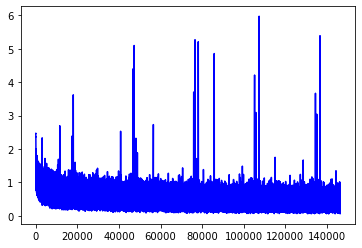

In [27]:

# DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR
learning_rate = 0.00005
criterion = nn.CrossEntropyLoss()
            #nn.NLLLoss()
            #nn.CrossEntropyLoss

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
# optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

#print(x.shape)
#print(y.shape)
#print(y)

training_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(dataset=training_set,batch_size=32)

# LOOP DE TREINAMENTO
num_epochs =10
contador_custo = []
for epoch in range(num_epochs):
    
    clear_output(wait=True)
    
    for local_batch, local_labels in trainloader:
        
        y_hat = model(local_batch)
        loss = criterion(y_hat,local_labels)

        contador_custo.append(loss)
        print(f'Epoch: {epoch} Loss: {loss}')

        #backward pass (calcular gradientes)
        loss.backward()

        #update (atualizar os pesos)
        optimizer.step()

        #limpar o otimizador
        optimizer.zero_grad()


# PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

In [ ]:
# Verificar performance nos dados de treinamento e testes

In [28]:

"""#Fazer a predição"""
predicoes = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        predicoes.append(y_hat.argmax().item())
    
df = pd.DataFrame({'Y': y_test, 'YHat': predicoes})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

0.8754052703297267

In [29]:

"""#Fazer a predição treino"""
predicoes = []
with torch.no_grad():
    for val in X_train:
        y_hat = model.forward(val)
        predicoes.append(y_hat.argmax().item())
    
df = pd.DataFrame({'Y': y_train, 'YHat': predicoes})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

0.8753737686991141

In [ ]:
# Pesquisa na internet a respeito de carregar e salvar dados, assim como rodar torch na gpu

In [ ]:
#torch.save(model, '/modelos/')

In [ ]:
#model = torch.load('/modelos/')
#model.eval()

In [30]:
#from torch.utils.cpp_extension import CUDA_HOME
#print(torch.cuda.is_available(), CUDA_HOME)

False None


In [ ]:
# Resultado
# Utilizar mini batch mostrou-se um bom método